### Created by Aslan Satary Dizaji (asataryd@umich.edu), Copyright (c) 2024.

Here are the codes to produce the plots of this project.

## Importing the required dependencies

In [1]:
import copy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import pdb
from scipy import stats
import scipy.io

## Parent folder

In [2]:
%matplotlib inline

parent_folder = osp.dirname(osp.abspath("./")) + '/tutorials/Results/'

## Helper function

In [3]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr = None, dh = 0.09, barh = 0.09, fs = None, maxasterix = None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        
        text = ''
        p = 0.05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y + barh, y + barh, y]
    mid = ((lx + rx) / 2, y + barh)

    ax.plot(barx, bary, c = 'black')

    kwargs = dict(ha = 'center', va = 'bottom')
    
    if fs is not None:
        kwargs['fontsize'] = fs

    ax.text(*mid, text, **kwargs)

## All results subfolders

In [4]:
results_subfolders = [
    "AgentAgent_Equality",
    "AgentAgent_InvIncomeWeightedUtility",
    "AgentPlanner_Arbitrary_Equality",
    "AgentPlanner_Arbitrary_InvIncomeWeightedUtility",
    "AgentPlanner_Extractive_Equality",
    "AgentPlanner_Extractive_InvIncomeWeightedUtility",
    "AgentPlanner_Inclusive_Equality",
    "AgentPlanner_Inclusive_InvIncomeWeightedUtility",
    "PlannerPlanner_Equality",
    "PlannerPlanner_InvIncomeWeightedUtility",
]

## Average Episode Reward across training for three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

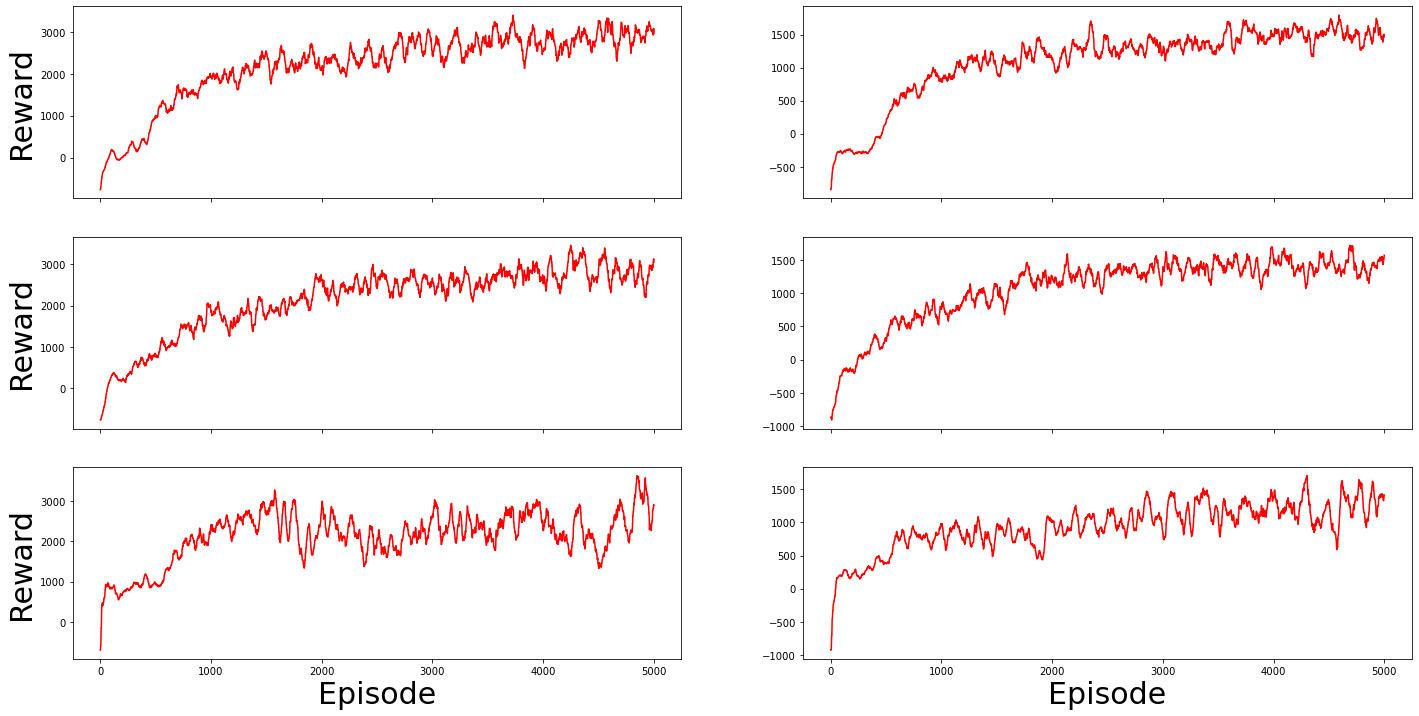

In [5]:
fig, axes = plt.subplots(3, 2, figsize = (8 * 3, 6 * 2), sharex = "col", sharey = "none")
#fig.suptitle('Average Episode Reward across Training', fontsize = 50)

run = [0, 1, 6, 7, 8, 9]

for i in range(3):
    for j in range(2):
        average_episode_reward = scipy.io.loadmat(parent_folder + results_subfolders[run[i * 2 + j]] + '/episode_reward_mean.mat')['episode_reward_mean']
        
        ax = axes[i, j]
        ax.plot(range(5000), average_episode_reward.squeeze(0), '-r')
        ax.set_xticks(np.arange(0, 5001, 1000))

        if i == 2:
            ax.set_xlabel('Episode', fontsize = 30)
        if j == 0:
            ax.set_ylabel('Reward', fontsize = 30)
        
fig.savefig('Average Episode Reward across Training for Three Governing Systems.png')      

## Average Episode Reward across training for three governing institutions: Inclusive, Arbitrary, Extractive

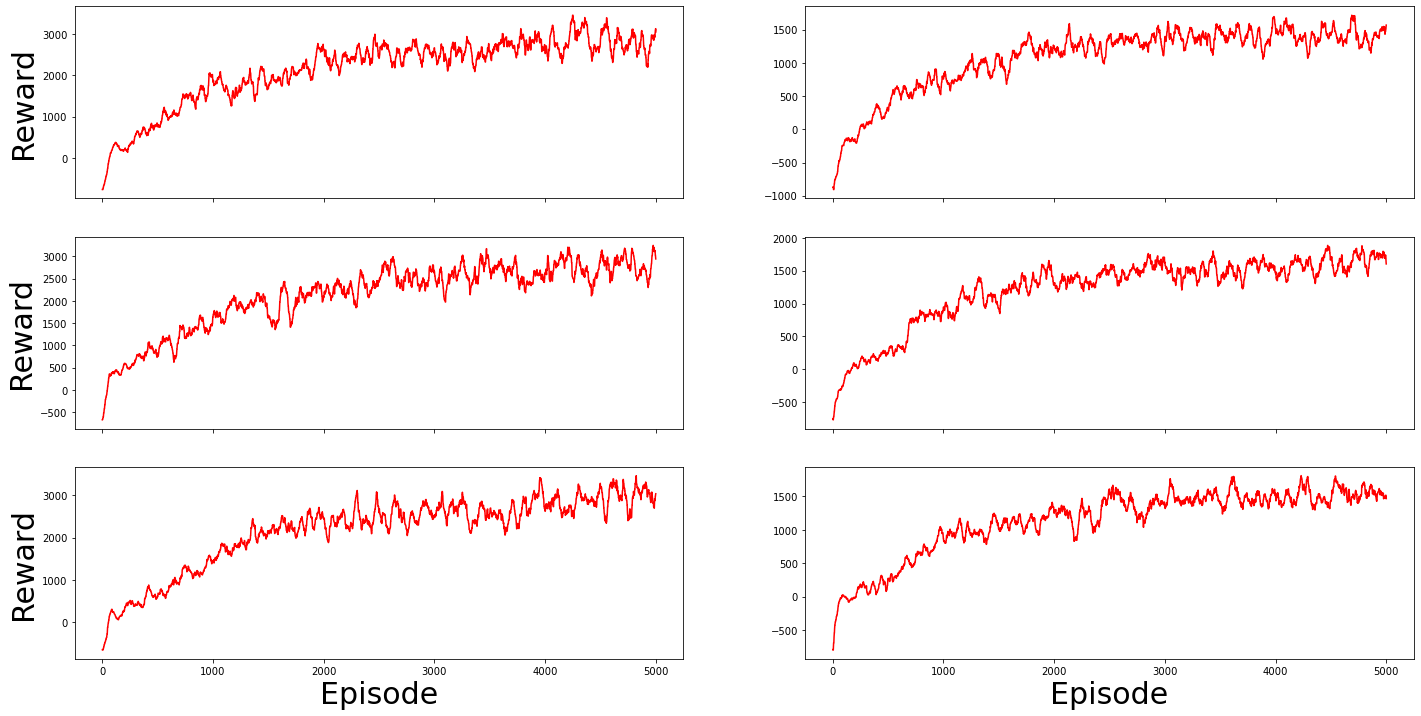

In [6]:
fig, axes = plt.subplots(3, 2, figsize = (8 * 3, 6 * 2), sharex = "col", sharey = "none")
#fig.suptitle('Average Episode Reward across Training', fontsize = 50)

run = [6, 7, 2, 3, 4, 5]

for i in range(3):
    for j in range(2):
        average_episode_reward = scipy.io.loadmat(parent_folder + results_subfolders[run[i * 2 + j]] + '/episode_reward_mean.mat')['episode_reward_mean']
        
        ax = axes[i, j]
        ax.plot(range(5000), average_episode_reward.squeeze(0), '-r')
        ax.set_xticks(np.arange(0, 5001, 1000))

        if i == 2:
            ax.set_xlabel('Episode', fontsize = 30)
        if j == 0:
            ax.set_ylabel('Reward', fontsize = 30)
        
fig.savefig('Average Episode Reward across Training for Three Governing Institutions.png') 

## Inequity aversion coefficients across three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

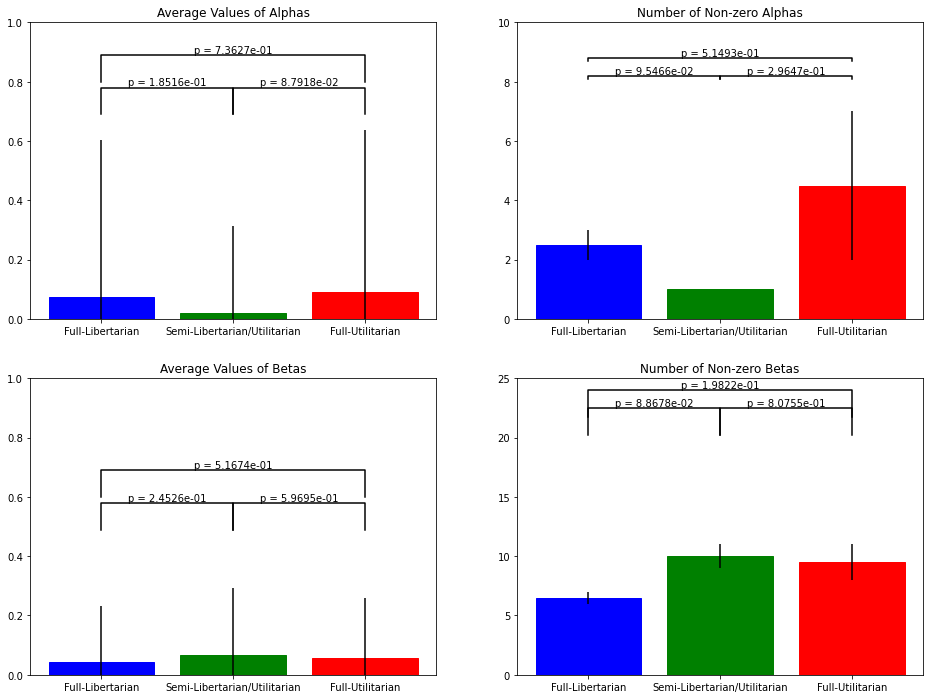

In [7]:
alpha_full_libertarian = []
alpha_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/alpha_opt.mat')['alpha_opt'])
alpha_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/alpha_opt.mat')['alpha_opt'])
alpha_full_libertarian = np.array(alpha_full_libertarian)

beta_full_libertarian = []
beta_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/beta_opt.mat')['beta_opt'])
beta_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/beta_opt.mat')['beta_opt'])
beta_full_libertarian = np.array(beta_full_libertarian)

alpha_semi_libertarian_utilitarian = []
alpha_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/alpha_opt.mat')['alpha_opt'])
alpha_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/alpha_opt.mat')['alpha_opt'])
alpha_semi_libertarian_utilitarian = np.array(alpha_semi_libertarian_utilitarian)

beta_semi_libertarian_utilitarian = []
beta_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/beta_opt.mat')['beta_opt'])
beta_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/beta_opt.mat')['beta_opt'])
beta_semi_libertarian_utilitarian = np.array(beta_semi_libertarian_utilitarian)

alpha_full_utilitarian = []
alpha_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/alpha_opt.mat')['alpha_opt'])
alpha_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/alpha_opt.mat')['alpha_opt'])
alpha_full_utilitarian = np.array(alpha_full_utilitarian)

beta_full_utilitarian = []
beta_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/beta_opt.mat')['beta_opt'])
beta_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/beta_opt.mat')['beta_opt'])
beta_full_utilitarian = np.array(beta_full_utilitarian)

fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
#fig.suptitle('Inequity Aversion Coefficients', fontsize = 20)

ax = axs[0, 0]

ax.set_title('Average Values of Alphas', fontsize = 12)

bar_list = ax.bar(range(0, 3), [alpha_full_libertarian.mean(axis = (0, 1, 2)), 
                                alpha_semi_libertarian_utilitarian.mean(axis = (0, 1, 2)), 
                                alpha_full_utilitarian.mean(axis = (0, 1, 2))],                                
                                yerr = [alpha_full_libertarian.std(axis = (0, 1, 2)), 
                                        alpha_semi_libertarian_utilitarian.std(axis = (0, 1, 2)), 
                                        alpha_full_utilitarian.std(axis = (0, 1, 2))])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 1))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian'])
    
t_stat_01, p_value_01 = stats.ttest_ind(alpha_full_libertarian.flatten(), alpha_semi_libertarian_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(alpha_full_libertarian.flatten(), alpha_full_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(alpha_semi_libertarian_utilitarian.flatten(), alpha_full_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [0.6, 0.6, 0.6])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [0.6, 0.6, 0.6])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [0.6, 0.6, 0.6], dh = 0.2)

ax = axs[0, 1]

ax.set_title('Number of Non-zero Alphas', fontsize = 12)

alpha_full_libertarian_nonzero = []
for i in range(alpha_full_libertarian.shape[0]):
    alpha_full_libertarian_nonzero.append(np.sum(alpha_full_libertarian[i] > 0))
alpha_full_libertarian_nonzero = np.array(alpha_full_libertarian_nonzero)
    
alpha_semi_libertarian_utilitarian_nonzero = []
for i in range(alpha_semi_libertarian_utilitarian.shape[0]):
    alpha_semi_libertarian_utilitarian_nonzero.append(np.sum(alpha_semi_libertarian_utilitarian[i] > 0))
alpha_semi_libertarian_utilitarian_nonzero = np.array(alpha_semi_libertarian_utilitarian_nonzero)
    
alpha_full_utilitarian_nonzero = []
for i in range(alpha_full_utilitarian.shape[0]):
    alpha_full_utilitarian_nonzero.append(np.sum(alpha_full_utilitarian[i] > 0))
alpha_full_utilitarian_nonzero = np.array(alpha_full_utilitarian_nonzero)

bar_list = ax.bar(range(0, 3), [alpha_full_libertarian_nonzero.mean(axis = 0), 
                                alpha_semi_libertarian_utilitarian_nonzero.mean(axis = 0), 
                                alpha_full_utilitarian_nonzero.mean(axis = 0)],                                
                                yerr = [alpha_full_libertarian_nonzero.std(axis = 0), 
                                        alpha_semi_libertarian_utilitarian_nonzero.std(axis = 0), 
                                        alpha_full_utilitarian_nonzero.std(axis = 0)])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 10))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian'])
    
t_stat_01, p_value_01 = stats.ttest_ind(alpha_full_libertarian_nonzero, alpha_semi_libertarian_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(alpha_full_libertarian_nonzero, alpha_full_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(alpha_semi_libertarian_utilitarian_nonzero, alpha_full_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [8, 8, 8])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [8, 8, 8])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [8, 8, 8], dh = 0.7)

ax = axs[1, 0]

ax.set_title('Average Values of Betas', fontsize = 12)

bar_list = ax.bar(range(0, 3), [beta_full_libertarian.mean(axis = (0, 1, 2)), 
                                beta_semi_libertarian_utilitarian.mean(axis = (0, 1, 2)), 
                                beta_full_utilitarian.mean(axis = (0, 1, 2))],                                
                                yerr = [beta_full_libertarian.std(axis = (0, 1, 2)), 
                                        beta_semi_libertarian_utilitarian.std(axis = (0, 1, 2)), 
                                        beta_full_utilitarian.std(axis = (0, 1, 2))])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 1))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian'])
    
t_stat_01, p_value_01 = stats.ttest_ind(beta_full_libertarian.flatten(), beta_semi_libertarian_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(beta_full_libertarian.flatten(), beta_full_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(beta_semi_libertarian_utilitarian.flatten(), beta_full_utilitarian.flatten(), equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [0.4, 0.4, 0.4])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [0.4, 0.4, 0.4])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [0.4, 0.4, 0.4], dh = 0.2)

ax = axs[1, 1]

ax.set_title('Number of Non-zero Betas', fontsize = 12)

beta_full_libertarian_nonzero = []
for i in range(beta_full_libertarian.shape[0]):
    beta_full_libertarian_nonzero.append(np.sum(beta_full_libertarian[i] > 0))
beta_full_libertarian_nonzero = np.array(beta_full_libertarian_nonzero)
    
beta_semi_libertarian_utilitarian_nonzero = []
for i in range(beta_semi_libertarian_utilitarian.shape[0]):
    beta_semi_libertarian_utilitarian_nonzero.append(np.sum(beta_semi_libertarian_utilitarian[i] > 0))
beta_semi_libertarian_utilitarian_nonzero = np.array(beta_semi_libertarian_utilitarian_nonzero)
    
beta_full_utilitarian_nonzero = []
for i in range(beta_full_utilitarian.shape[0]):
    beta_full_utilitarian_nonzero.append(np.sum(beta_full_utilitarian[i] > 0))
beta_full_utilitarian_nonzero = np.array(beta_full_utilitarian_nonzero)

bar_list = ax.bar(range(0, 3), [beta_full_libertarian_nonzero.mean(axis = 0), 
                                beta_semi_libertarian_utilitarian_nonzero.mean(axis = 0), 
                                beta_full_utilitarian_nonzero.mean(axis = 0)],                                
                                yerr = [beta_full_libertarian_nonzero.std(axis = 0), 
                                        beta_semi_libertarian_utilitarian_nonzero.std(axis = 0), 
                                        beta_full_utilitarian_nonzero.std(axis = 0)])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 25))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian'])
    
t_stat_01, p_value_01 = stats.ttest_ind(beta_full_libertarian_nonzero, beta_semi_libertarian_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(beta_full_libertarian_nonzero, beta_full_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(beta_semi_libertarian_utilitarian_nonzero, beta_full_utilitarian_nonzero, equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [18, 18, 18])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [18, 18, 18])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [18, 18, 18], dh = 0.15)

fig.savefig('Inequity Aversion Coefficients for Three Governing Systems.png')

## Inequity aversion coefficients in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

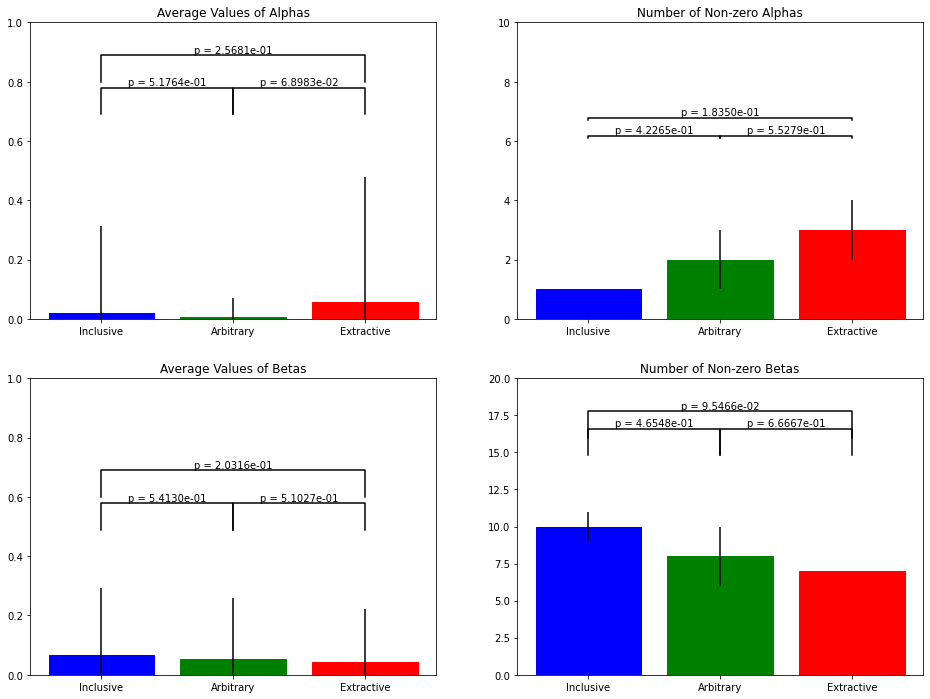

In [8]:
alpha_inclusive = []
alpha_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/alpha_opt.mat')['alpha_opt'])
alpha_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/alpha_opt.mat')['alpha_opt'])
alpha_inclusive = np.array(alpha_inclusive)

beta_inclusive = []
beta_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/beta_opt.mat')['beta_opt'])
beta_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/beta_opt.mat')['beta_opt'])
beta_inclusive = np.array(beta_inclusive)

alpha_arbitrary = []
alpha_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/alpha_opt.mat')['alpha_opt'])
alpha_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/alpha_opt.mat')['alpha_opt'])
alpha_arbitrary = np.array(alpha_arbitrary)

beta_arbitrary = []
beta_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/beta_opt.mat')['beta_opt'])
beta_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/beta_opt.mat')['beta_opt'])
beta_arbitrary = np.array(beta_arbitrary)

alpha_extractive = []
alpha_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/alpha_opt.mat')['alpha_opt'])
alpha_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/alpha_opt.mat')['alpha_opt'])
alpha_extractive = np.array(alpha_extractive)

beta_extractive = []
beta_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/beta_opt.mat')['beta_opt'])
beta_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/beta_opt.mat')['beta_opt'])
beta_extractive = np.array(beta_extractive)

fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
#fig.suptitle('Inequity Aversion Coefficients', fontsize = 20)

ax = axs[0, 0]

ax.set_title('Average Values of Alphas', fontsize = 12)

bar_list = ax.bar(range(0, 3), [alpha_inclusive.mean(axis = (0, 1, 2)), 
                                alpha_arbitrary.mean(axis = (0, 1, 2)), 
                                alpha_extractive.mean(axis = (0, 1, 2))],                                
                                yerr = [alpha_inclusive.std(axis = (0, 1, 2)), 
                                        alpha_arbitrary.std(axis = (0, 1, 2)), 
                                        alpha_extractive.std(axis = (0, 1, 2))])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 1))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Inclusive', 'Arbitrary', 'Extractive'])
    
t_stat_01, p_value_01 = stats.ttest_ind(alpha_inclusive.flatten(), alpha_arbitrary.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(alpha_inclusive.flatten(), alpha_extractive.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(alpha_arbitrary.flatten(), alpha_extractive.flatten(), equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [0.6, 0.6, 0.6])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [0.6, 0.6, 0.6])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [0.6, 0.6, 0.6], dh = 0.2)

ax = axs[0, 1]

ax.set_title('Number of Non-zero Alphas', fontsize = 12)

alpha_inclusive_nonzero = []
for i in range(alpha_inclusive.shape[0]):
    alpha_inclusive_nonzero.append(np.sum(alpha_inclusive[i] > 0))
alpha_inclusive_nonzero = np.array(alpha_inclusive_nonzero)
    
alpha_arbitrary_nonzero = []
for i in range(alpha_arbitrary.shape[0]):
    alpha_arbitrary_nonzero.append(np.sum(alpha_arbitrary[i] > 0))
alpha_arbitrary_nonzero = np.array(alpha_arbitrary_nonzero)
    
alpha_extractive_nonzero = []
for i in range(alpha_extractive.shape[0]):
    alpha_extractive_nonzero.append(np.sum(alpha_extractive[i] > 0))
alpha_extractive_nonzero = np.array(alpha_extractive_nonzero)

bar_list = ax.bar(range(0, 3), [alpha_inclusive_nonzero.mean(axis = 0), 
                                alpha_arbitrary_nonzero.mean(axis = 0), 
                                alpha_extractive_nonzero.mean(axis = 0)],                                
                                yerr = [alpha_inclusive_nonzero.std(axis = 0), 
                                        alpha_arbitrary_nonzero.std(axis = 0), 
                                        alpha_extractive_nonzero.std(axis = 0)])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 10))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Inclusive', 'Arbitrary', 'Extractive'])
    
t_stat_01, p_value_01 = stats.ttest_ind(alpha_inclusive_nonzero, alpha_arbitrary_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(alpha_inclusive_nonzero, alpha_extractive_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(alpha_arbitrary_nonzero, alpha_extractive_nonzero, equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [6, 6, 6])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [6, 6, 6])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [6, 6, 6], dh = 0.7)

ax = axs[1, 0]

ax.set_title('Average Values of Betas', fontsize = 12)

bar_list = ax.bar(range(0, 3), [beta_inclusive.mean(axis = (0, 1, 2)), 
                                beta_arbitrary.mean(axis = (0, 1, 2)), 
                                beta_extractive.mean(axis = (0, 1, 2))],                                
                                yerr = [beta_inclusive.std(axis = (0, 1, 2)), 
                                        beta_arbitrary.std(axis = (0, 1, 2)), 
                                        beta_extractive.std(axis = (0, 1, 2))])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 1))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Inclusive', 'Arbitrary', 'Extractive'])
    
t_stat_01, p_value_01 = stats.ttest_ind(beta_inclusive.flatten(), beta_arbitrary.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(beta_inclusive.flatten(), beta_extractive.flatten(), equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(beta_arbitrary.flatten(), beta_extractive.flatten(), equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [0.4, 0.4, 0.4])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [0.4, 0.4, 0.4])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [0.4, 0.4, 0.4], dh = 0.2)

ax = axs[1, 1]

ax.set_title('Number of Non-zero Betas', fontsize = 12)

beta_inclusive_nonzero = []
for i in range(beta_inclusive.shape[0]):
    beta_inclusive_nonzero.append(np.sum(beta_inclusive[i] > 0))
beta_inclusive_nonzero = np.array(beta_inclusive_nonzero)
    
beta_arbitrary_nonzero = []
for i in range(beta_arbitrary.shape[0]):
    beta_arbitrary_nonzero.append(np.sum(beta_arbitrary[i] > 0))
beta_arbitrary_nonzero = np.array(beta_arbitrary_nonzero)
    
beta_extractive_nonzero = []
for i in range(beta_extractive.shape[0]):
    beta_extractive_nonzero.append(np.sum(beta_extractive[i] > 0))
beta_extractive_nonzero = np.array(beta_extractive_nonzero)

bar_list = ax.bar(range(0, 3), [beta_inclusive_nonzero.mean(axis = 0), 
                                beta_arbitrary_nonzero.mean(axis = 0), 
                                beta_extractive_nonzero.mean(axis = 0)],                                
                                yerr = [beta_inclusive_nonzero.std(axis = 0), 
                                        beta_arbitrary_nonzero.std(axis = 0), 
                                        beta_extractive_nonzero.std(axis = 0)])

bar_list[0].set_color('b')
bar_list[1].set_color('g')
bar_list[2].set_color('r')
    
ax.set_ylim((0, 20))
ax.set_xticks(range(0, 3))
ax.set_xticklabels(['Inclusive', 'Arbitrary', 'Extractive'])
    
t_stat_01, p_value_01 = stats.ttest_ind(beta_inclusive_nonzero, beta_arbitrary_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_02, p_value_02 = stats.ttest_ind(beta_inclusive_nonzero, beta_extractive_nonzero, equal_var = True, nan_policy = 'omit')
t_stat_12, p_value_12 = stats.ttest_ind(beta_arbitrary_nonzero, beta_extractive_nonzero, equal_var = True, nan_policy = 'omit')

barplot_annotate_brackets(0, 1, 'p = {:.4e}'.format(p_value_01), np.arange(3), [13, 13, 13])
barplot_annotate_brackets(1, 2, 'p = {:.4e}'.format(p_value_12), np.arange(3), [13, 13, 13])
barplot_annotate_brackets(0, 2, 'p = {:.4e}'.format(p_value_02), np.arange(3), [13, 13, 13], dh = 0.15)

fig.savefig('Inequity Aversion Coefficients for Three Governing Institutions.png')

## Productivity, Equality, and Maximin across three governing systems: Full-Libertarian, Semi-Libertarian/Utilitarian, Full-Utilitarian

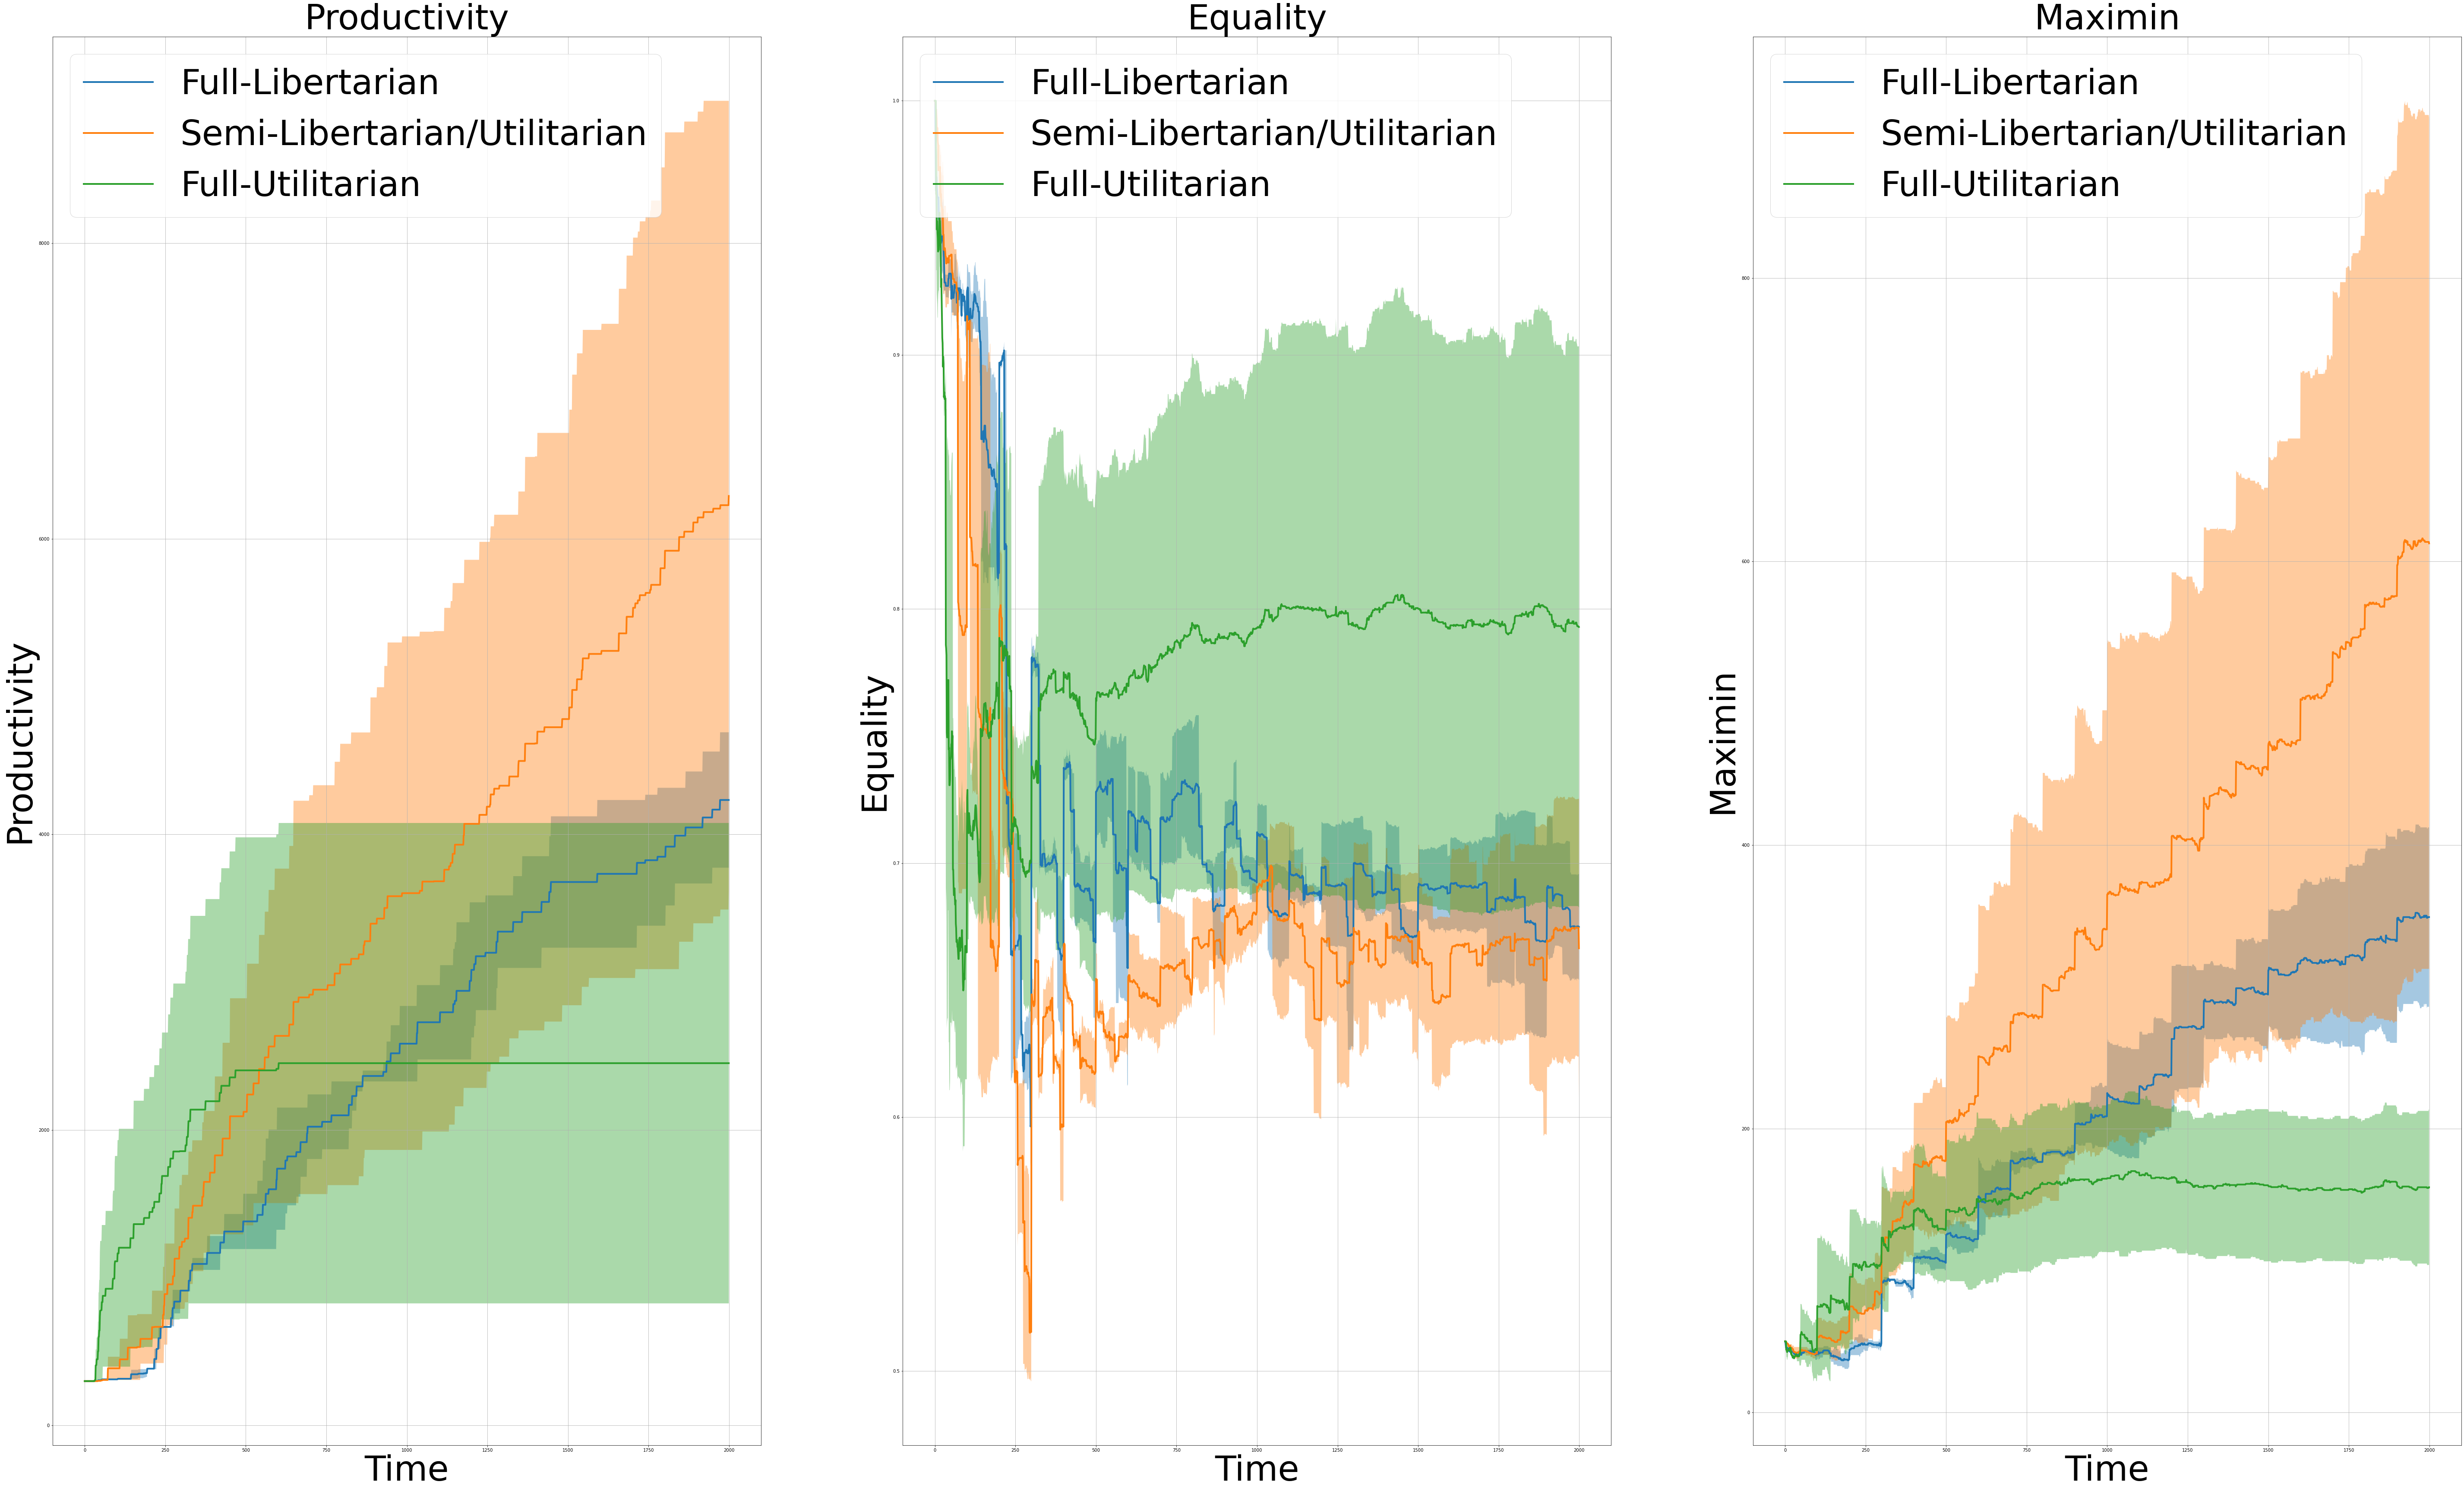

In [9]:
productivity_full_libertarian = []
productivity_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/productivity.mat')['productivity'])
productivity_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/productivity.mat')['productivity'])
productivity_full_libertarian = np.array(productivity_full_libertarian).squeeze(1)

equality_full_libertarian = []
equality_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/equality.mat')['equality'])
equality_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/equality.mat')['equality'])
equality_full_libertarian = np.array(equality_full_libertarian).squeeze(1)

maximin_full_libertarian = []
maximin_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/maximin.mat')['maximin'])
maximin_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/maximin.mat')['maximin'])
maximin_full_libertarian = np.array(maximin_full_libertarian).squeeze(1)

productivity_semi_libertarian_utilitarian = []
productivity_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/productivity.mat')['productivity'])
productivity_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/productivity.mat')['productivity'])
productivity_semi_libertarian_utilitarian = np.array(productivity_semi_libertarian_utilitarian).squeeze(1)

equality_semi_libertarian_utilitarian = []
equality_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/equality.mat')['equality'])
equality_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/equality.mat')['equality'])
equality_semi_libertarian_utilitarian = np.array(equality_semi_libertarian_utilitarian).squeeze(1)

maximin_semi_libertarian_utilitarian = []
maximin_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/maximin.mat')['maximin'])
maximin_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/maximin.mat')['maximin'])
maximin_semi_libertarian_utilitarian = np.array(maximin_semi_libertarian_utilitarian).squeeze(1)

productivity_full_utilitarian = []
productivity_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/productivity.mat')['productivity'])
productivity_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/productivity.mat')['productivity'])
productivity_full_utilitarian = np.array(productivity_full_utilitarian).squeeze(1)

equality_full_utilitarian = []
equality_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/equality.mat')['equality'])
equality_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/equality.mat')['equality'])
equality_full_utilitarian = np.array(equality_full_utilitarian).squeeze(1)

maximin_full_utilitarian = []
maximin_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/maximin.mat')['maximin'])
maximin_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/maximin.mat')['maximin'])
maximin_full_utilitarian = np.array(maximin_full_utilitarian).squeeze(1)

fig, axes = plt.subplots(1, 3, figsize = (100 * 1, 20 * 3), sharex = 'row', sharey = 'col')
#fig.suptitle('Productivity, Equality, and Maximin across an Episode for Three Governing Systems', fontsize = 100)

ax = axes[0]
ax.plot(np.arange(2000), productivity_full_libertarian.mean(axis = 0), lw = 4, label = 'Full-Libertarian')
ax.plot(np.arange(2000), productivity_semi_libertarian_utilitarian.mean(axis = 0), lw = 4, label = 'Semi-Libertarian/Utilitarian')
ax.plot(np.arange(2000), productivity_full_utilitarian.mean(axis = 0), lw = 4, label = 'Full-Utilitarian')
ax.fill_between(np.arange(2000), productivity_full_libertarian.mean(axis = 0) + productivity_full_libertarian.std(axis = 0), productivity_full_libertarian.mean(axis = 0) - productivity_full_libertarian.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), productivity_semi_libertarian_utilitarian.mean(axis = 0) + productivity_semi_libertarian_utilitarian.std(axis = 0), productivity_semi_libertarian_utilitarian.mean(axis = 0) - productivity_semi_libertarian_utilitarian.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), productivity_full_utilitarian.mean(axis = 0) + productivity_full_utilitarian.std(axis = 0), productivity_full_utilitarian.mean(axis = 0) - productivity_full_utilitarian.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Productivity', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Productivity', fontsize = 80)
ax.grid()

ax = axes[1]
ax.plot(np.arange(2000), equality_full_libertarian.mean(axis = 0), lw = 4, label = 'Full-Libertarian')
ax.plot(np.arange(2000), equality_semi_libertarian_utilitarian.mean(axis = 0), lw = 4, label = 'Semi-Libertarian/Utilitarian')
ax.plot(np.arange(2000), equality_full_utilitarian.mean(axis = 0), lw = 4, label = 'Full-Utilitarian')
ax.fill_between(np.arange(2000), equality_full_libertarian.mean(axis = 0) + equality_full_libertarian.std(axis = 0), equality_full_libertarian.mean(axis = 0) - equality_full_libertarian.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), equality_semi_libertarian_utilitarian.mean(axis = 0) + equality_semi_libertarian_utilitarian.std(axis = 0), equality_semi_libertarian_utilitarian.mean(axis = 0) - equality_semi_libertarian_utilitarian.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), equality_full_utilitarian.mean(axis = 0) + equality_full_utilitarian.std(axis = 0), equality_full_utilitarian.mean(axis = 0) - equality_full_utilitarian.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Equality', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Equality', fontsize = 80)
ax.grid()

ax = axes[2]
ax.plot(np.arange(2000), maximin_full_libertarian.mean(axis = 0), lw = 4, label = 'Full-Libertarian')
ax.plot(np.arange(2000), maximin_semi_libertarian_utilitarian.mean(axis = 0), lw = 4, label = 'Semi-Libertarian/Utilitarian')
ax.plot(np.arange(2000), maximin_full_utilitarian.mean(axis = 0), lw = 4, label = 'Full-Utilitarian')
ax.fill_between(np.arange(2000), maximin_full_libertarian.mean(axis = 0) + maximin_full_libertarian.std(axis = 0), maximin_full_libertarian.mean(axis = 0) - maximin_full_libertarian.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), maximin_semi_libertarian_utilitarian.mean(axis = 0) + maximin_semi_libertarian_utilitarian.std(axis = 0), maximin_semi_libertarian_utilitarian.mean(axis = 0) - maximin_semi_libertarian_utilitarian.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), maximin_full_utilitarian.mean(axis = 0) + maximin_full_utilitarian.std(axis = 0), maximin_full_utilitarian.mean(axis = 0) - maximin_full_utilitarian.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Maximin', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Maximin', fontsize = 80)
ax.grid()

fig.savefig('Productivity, Equality, and Maximin across an Episode for Three Governing Systems.png')

## Productivity, Equality, and Maximin in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

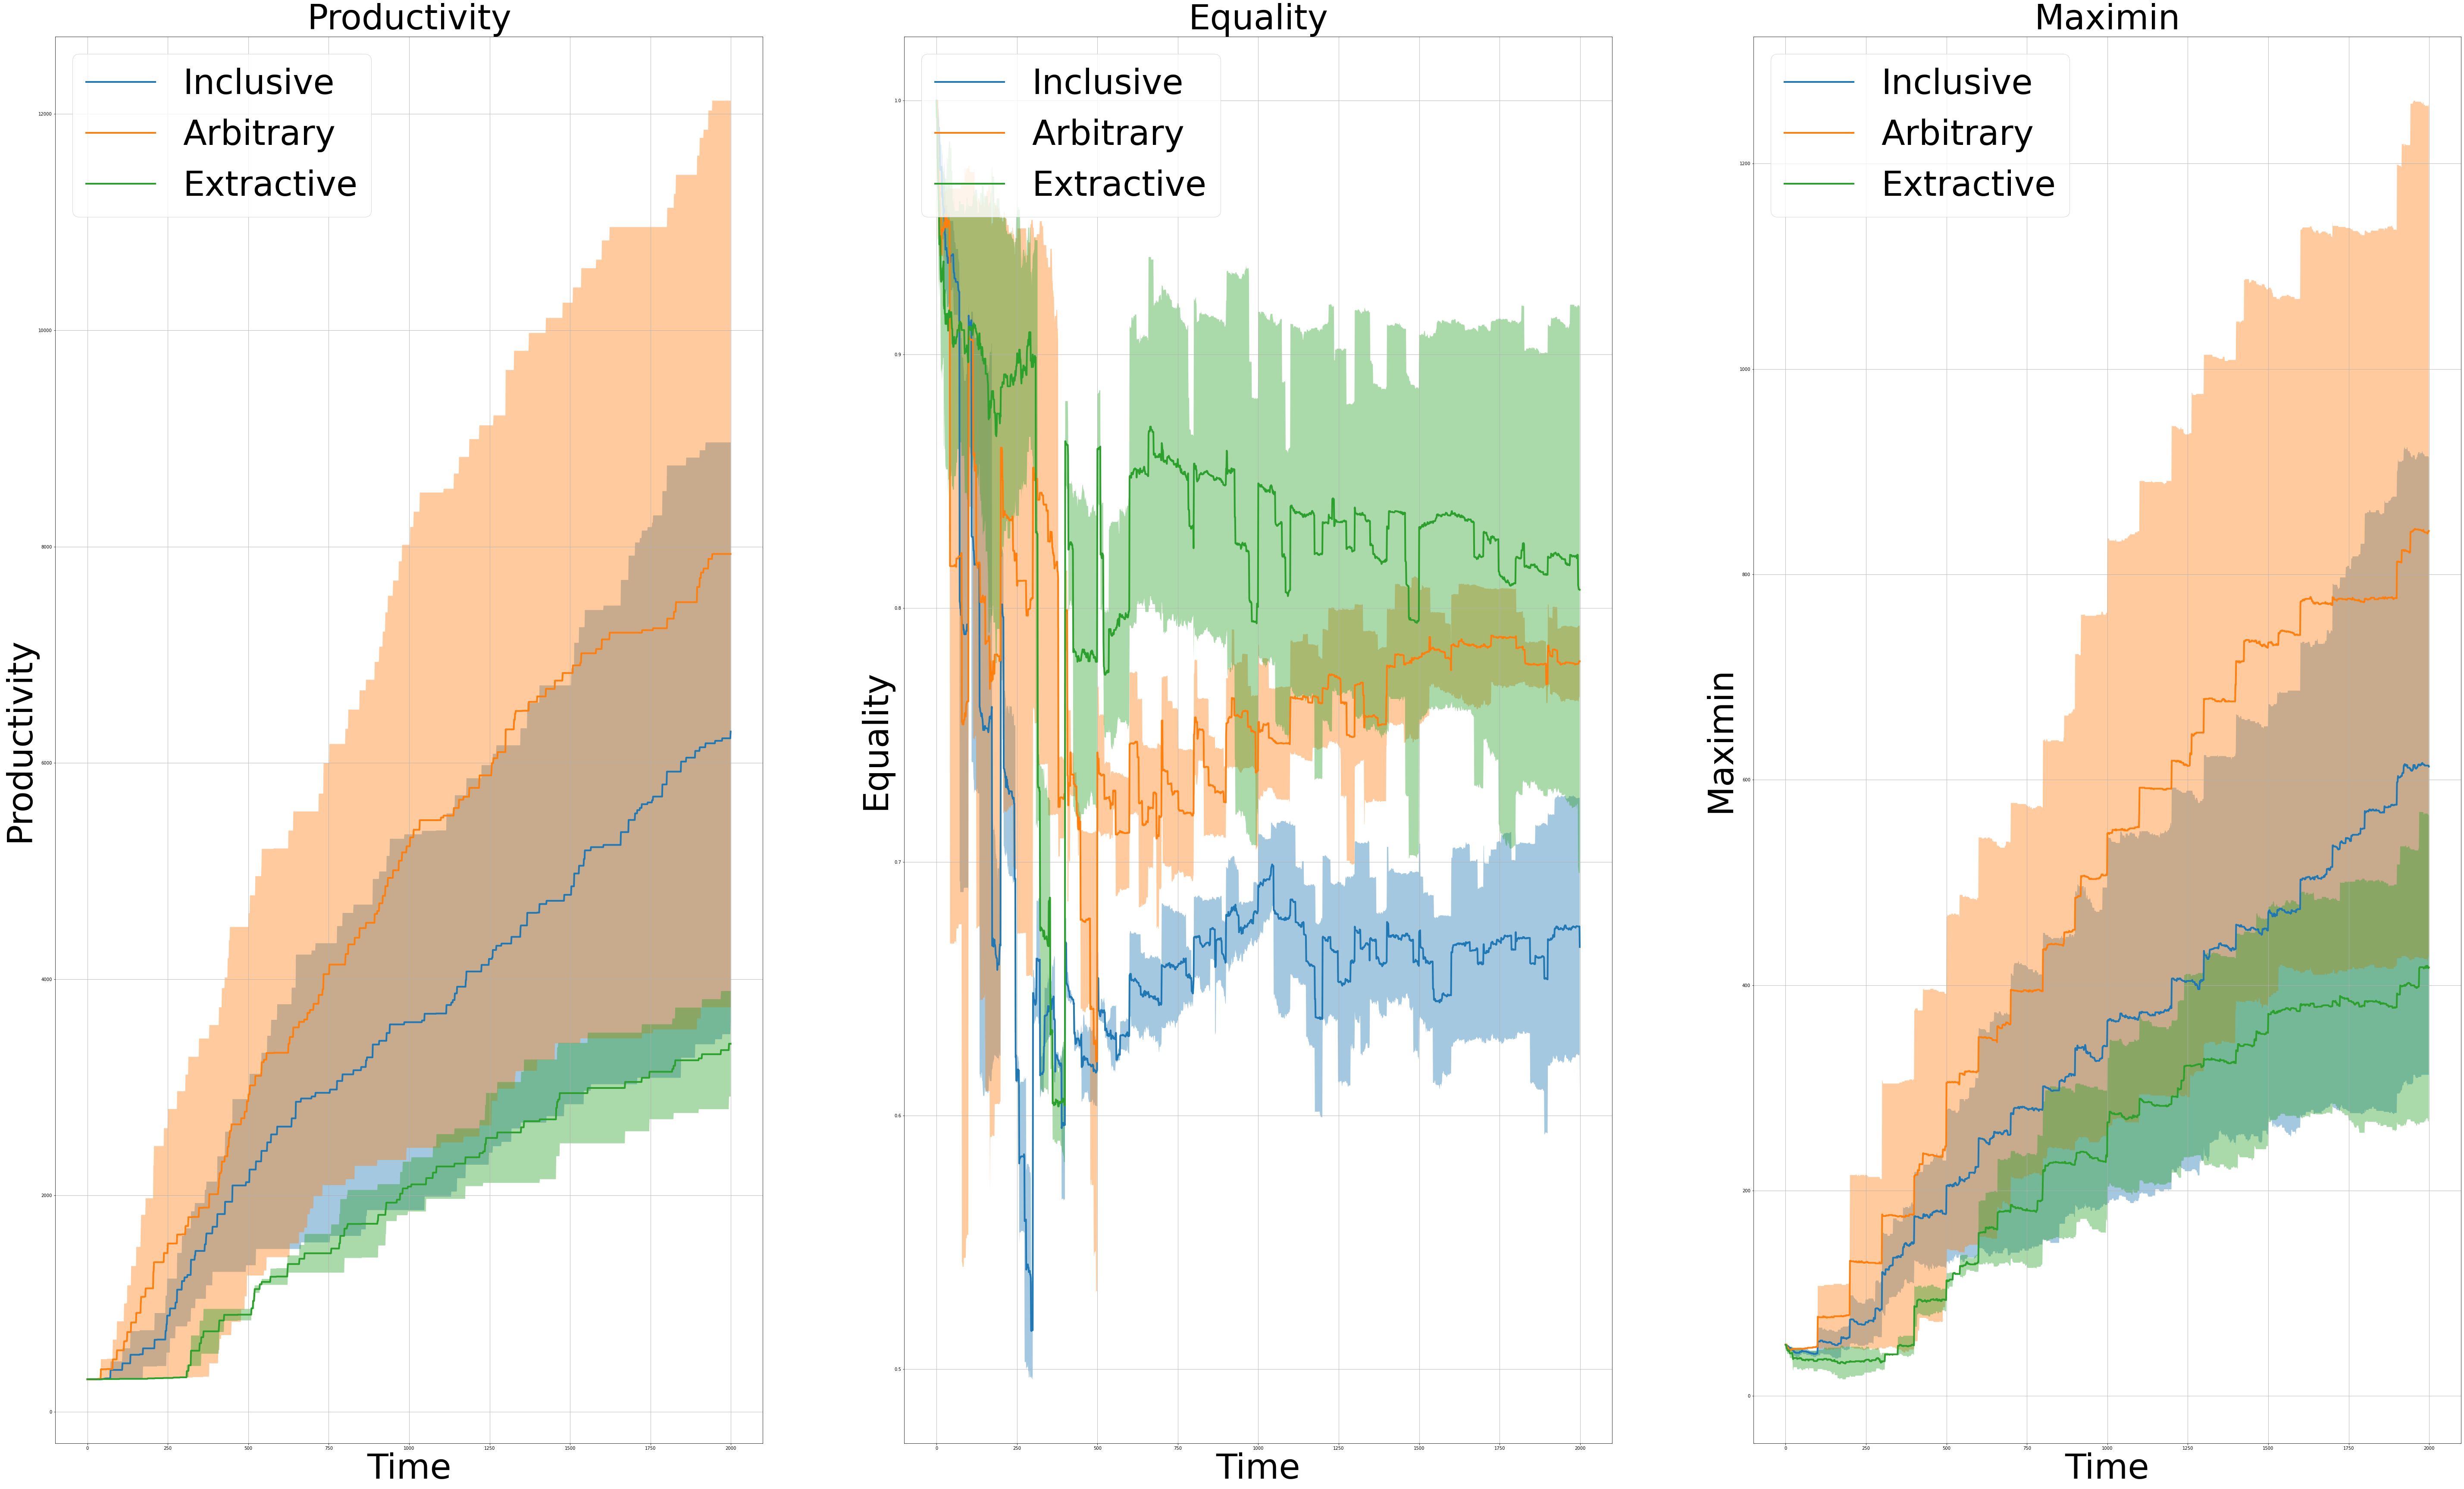

In [10]:
productivity_inclusive = []
productivity_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/productivity.mat')['productivity'])
productivity_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/productivity.mat')['productivity'])
productivity_inclusive = np.array(productivity_inclusive).squeeze(1)

equality_inclusive = []
equality_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/equality.mat')['equality'])
equality_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/equality.mat')['equality'])
equality_inclusive = np.array(equality_inclusive).squeeze(1)

maximin_inclusive = []
maximin_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/maximin.mat')['maximin'])
maximin_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/maximin.mat')['maximin'])
maximin_inclusive = np.array(maximin_inclusive).squeeze(1)

productivity_arbitrary = []
productivity_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/productivity.mat')['productivity'])
productivity_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/productivity.mat')['productivity'])
productivity_arbitrary = np.array(productivity_arbitrary).squeeze(1)

equality_arbitrary = []
equality_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/equality.mat')['equality'])
equality_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/equality.mat')['equality'])
equality_arbitrary = np.array(equality_arbitrary).squeeze(1)

maximin_arbitrary = []
maximin_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/maximin.mat')['maximin'])
maximin_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/maximin.mat')['maximin'])
maximin_arbitrary = np.array(maximin_arbitrary).squeeze(1)

productivity_extractive = []
productivity_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/productivity.mat')['productivity'])
productivity_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/productivity.mat')['productivity'])
productivity_extractive = np.array(productivity_extractive).squeeze(1)

equality_extractive = []
equality_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/equality.mat')['equality'])
equality_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/equality.mat')['equality'])
equality_extractive = np.array(equality_extractive).squeeze(1)

maximin_extractive = []
maximin_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/maximin.mat')['maximin'])
maximin_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/maximin.mat')['maximin'])
maximin_extractive = np.array(maximin_extractive).squeeze(1)

fig, axes = plt.subplots(1, 3, figsize = (100 * 1, 20 * 3), sharex = 'row', sharey = 'col')
#fig.suptitle('Productivity, Equality, and Maximin across an Episode for Three Governing Institutions', fontsize = 100)

ax = axes[0]
ax.plot(np.arange(2000), productivity_inclusive.mean(axis = 0), lw = 4, label = 'Inclusive')
ax.plot(np.arange(2000), productivity_arbitrary.mean(axis = 0), lw = 4, label = 'Arbitrary')
ax.plot(np.arange(2000), productivity_extractive.mean(axis = 0), lw = 4, label = 'Extractive')
ax.fill_between(np.arange(2000), productivity_inclusive.mean(axis = 0) + productivity_inclusive.std(axis = 0), productivity_inclusive.mean(axis = 0) - productivity_inclusive.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), productivity_arbitrary.mean(axis = 0) + productivity_arbitrary.std(axis = 0), productivity_arbitrary.mean(axis = 0) - productivity_arbitrary.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), productivity_extractive.mean(axis = 0) + productivity_extractive.std(axis = 0), productivity_extractive.mean(axis = 0) - productivity_extractive.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Productivity', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Productivity', fontsize = 80)
ax.grid()

ax = axes[1]
ax.plot(np.arange(2000), equality_inclusive.mean(axis = 0), lw = 4, label = 'Inclusive')
ax.plot(np.arange(2000), equality_arbitrary.mean(axis = 0), lw = 4, label = 'Arbitrary')
ax.plot(np.arange(2000), equality_extractive.mean(axis = 0), lw = 4, label = 'Extractive')
ax.fill_between(np.arange(2000), equality_inclusive.mean(axis = 0) + equality_inclusive.std(axis = 0), equality_inclusive.mean(axis = 0) - equality_inclusive.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), equality_arbitrary.mean(axis = 0) + equality_arbitrary.std(axis = 0), equality_arbitrary.mean(axis = 0) - equality_arbitrary.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), equality_extractive.mean(axis = 0) + equality_extractive.std(axis = 0), equality_extractive.mean(axis = 0) - equality_extractive.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Equality', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Equality', fontsize = 80)
ax.grid()

ax = axes[2]
ax.plot(np.arange(2000), maximin_inclusive.mean(axis = 0), lw = 4, label = 'Inclusive')
ax.plot(np.arange(2000), maximin_arbitrary.mean(axis = 0), lw = 4, label = 'Arbitrary')
ax.plot(np.arange(2000), maximin_extractive.mean(axis = 0), lw = 4, label = 'Extractive')
ax.fill_between(np.arange(2000), maximin_inclusive.mean(axis = 0) + maximin_inclusive.std(axis = 0), maximin_inclusive.mean(axis = 0) - maximin_inclusive.std(axis = 0), facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), maximin_arbitrary.mean(axis = 0) + maximin_arbitrary.std(axis = 0), maximin_arbitrary.mean(axis = 0) - maximin_arbitrary.std(axis = 0), facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), maximin_extractive.mean(axis = 0) + maximin_extractive.std(axis = 0), maximin_extractive.mean(axis = 0) - maximin_extractive.std(axis = 0), facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 80)
ax.set_title('Maximin', fontsize = 80)
ax.set_xlabel('Time', fontsize = 80)
ax.set_ylabel('Maximin', fontsize = 80)
ax.grid()

fig.savefig('Productivity, Equality, and Maximin across an Episode for Three Governing Institutions.png')

## Productivity, Equality, and Maximin vs Inequity Aversion Coefficients across three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

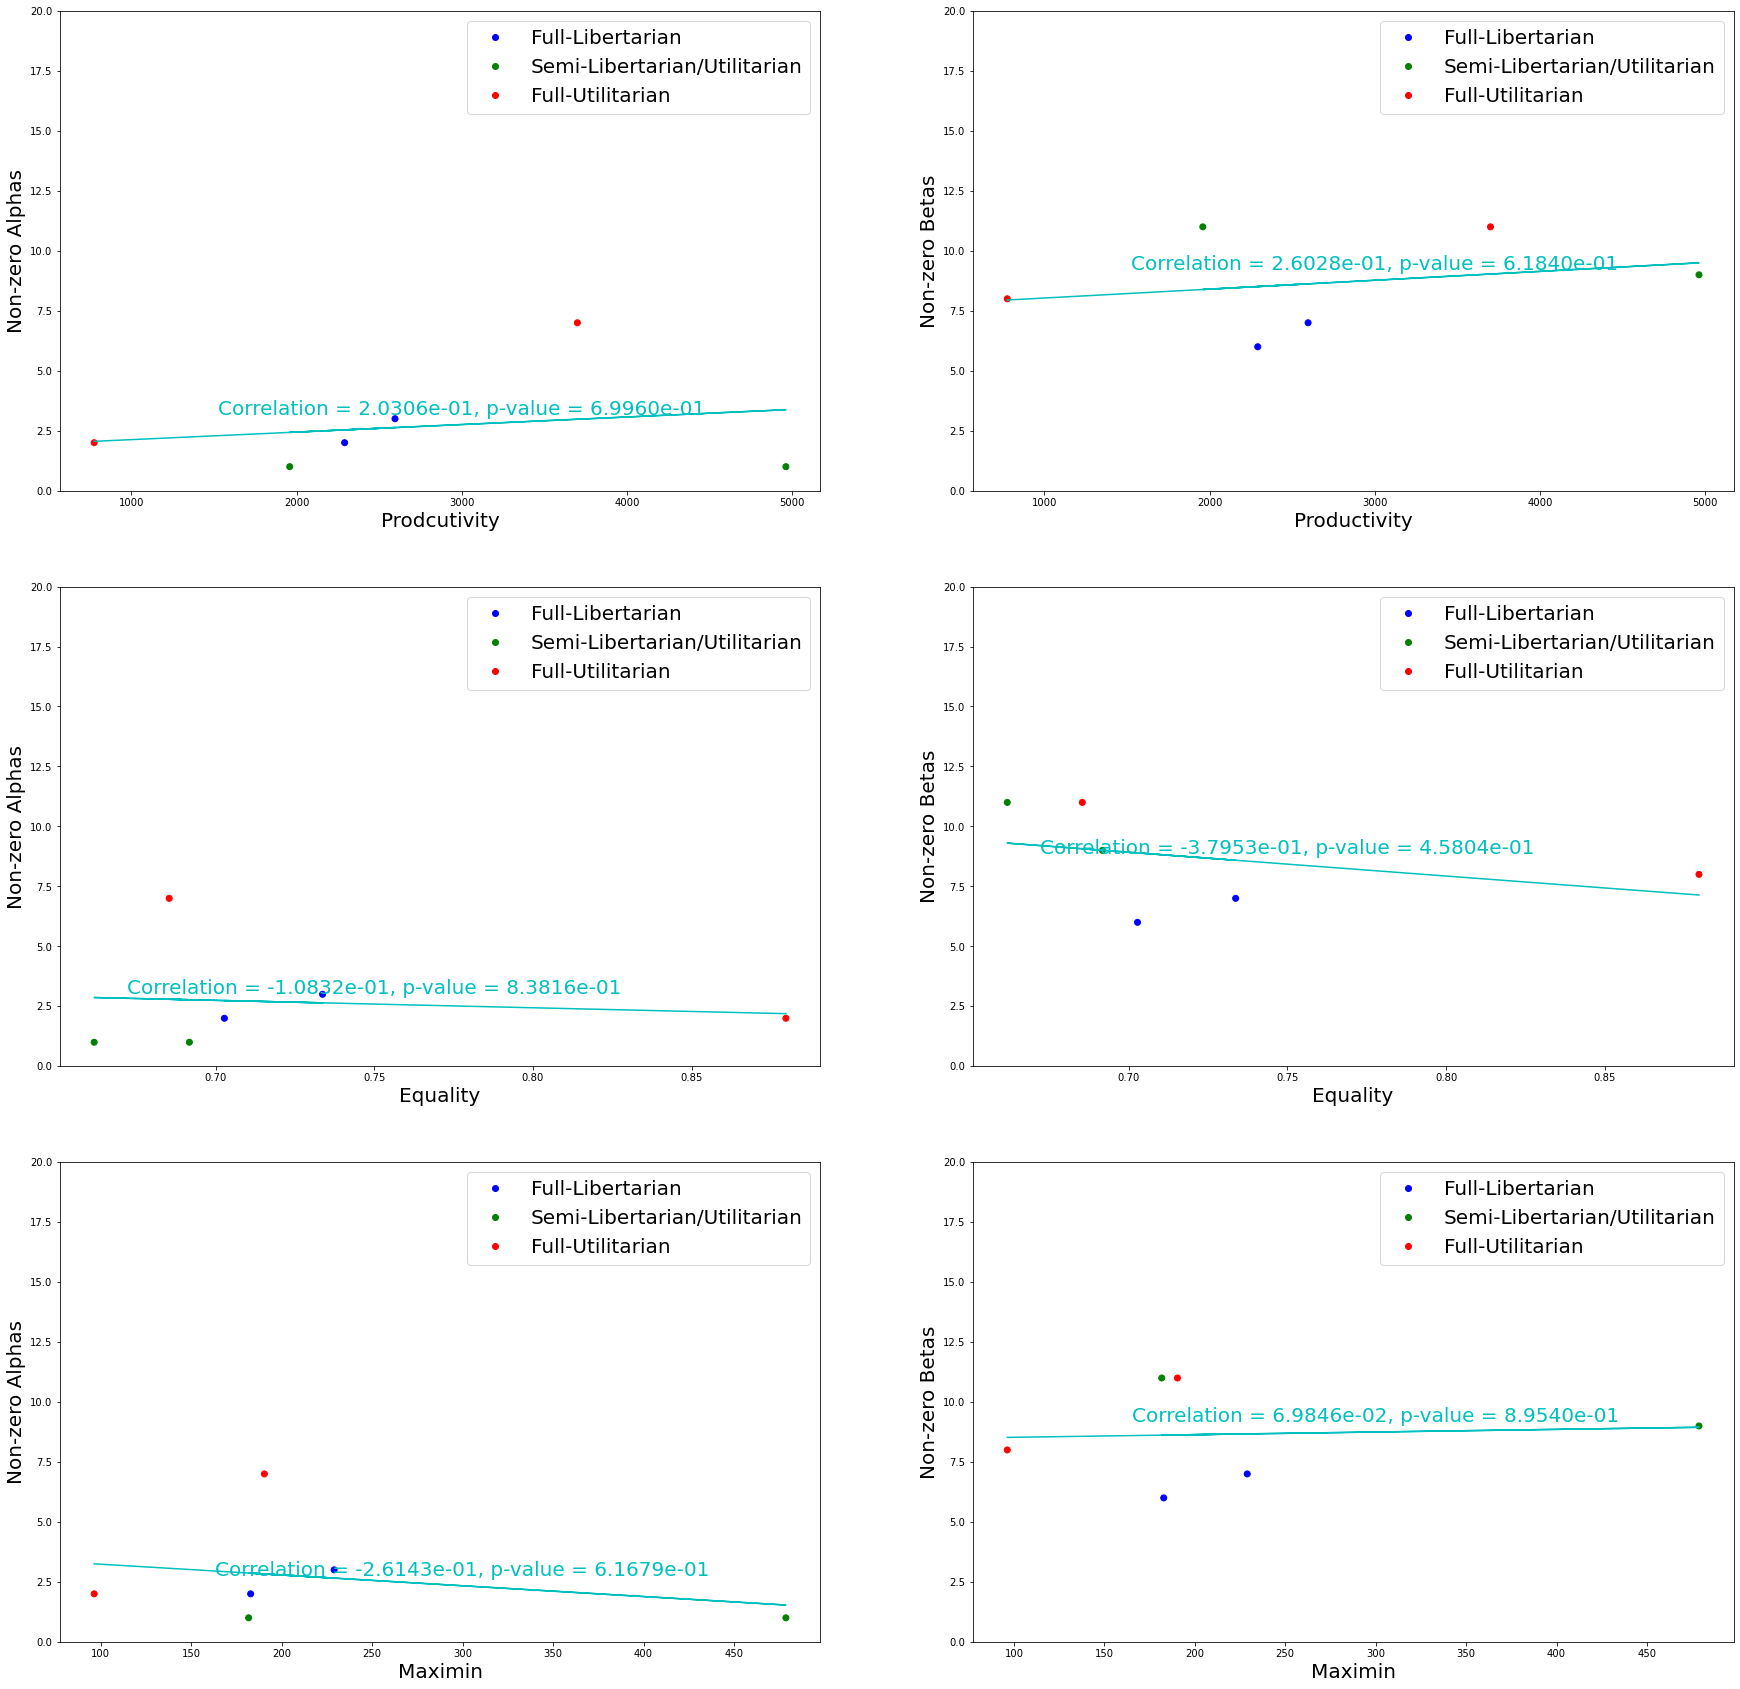

In [11]:
fig, axs = plt.subplots(3, 2, figsize = (10 * 3, 15 * 2))
#fig.suptitle('Productivity, Equality, and Maximin vs Inequity Aversion Coefficients across Three Governing Systems', fontsize=30)

ax = axs[0, 0]

ax.set_xlabel('Prodcutivity', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [productivity_full_libertarian[0].mean(),
     productivity_full_libertarian[1].mean(),
     productivity_semi_libertarian_utilitarian[0].mean(),
     productivity_semi_libertarian_utilitarian[1].mean(),
     productivity_full_utilitarian[0].mean(),
     productivity_full_utilitarian[1].mean()]

y = [alpha_full_libertarian_nonzero[0],
     alpha_full_libertarian_nonzero[1],
     alpha_semi_libertarian_utilitarian_nonzero[0],
     alpha_semi_libertarian_utilitarian_nonzero[1],
     alpha_full_utilitarian_nonzero[0],
     alpha_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3000, intercept + slope * 3000),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[0, 1]

ax.set_xlabel('Productivity', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [productivity_full_libertarian[0].mean(),
     productivity_full_libertarian[1].mean(),
     productivity_semi_libertarian_utilitarian[0].mean(),
     productivity_semi_libertarian_utilitarian[1].mean(),
     productivity_full_utilitarian[0].mean(),
     productivity_full_utilitarian[1].mean()]

y = [beta_full_libertarian_nonzero[0],
     beta_full_libertarian_nonzero[1],
     beta_semi_libertarian_utilitarian_nonzero[0],
     beta_semi_libertarian_utilitarian_nonzero[1],
     beta_full_utilitarian_nonzero[0],
     beta_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3000, intercept + slope * 3000),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))

ax = axs[1, 0]

ax.set_xlabel('Equality', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [equality_full_libertarian[0].mean(),
     equality_full_libertarian[1].mean(),
     equality_semi_libertarian_utilitarian[0].mean(),
     equality_semi_libertarian_utilitarian[1].mean(),
     equality_full_utilitarian[0].mean(),
     equality_full_utilitarian[1].mean()]

y = [alpha_full_libertarian_nonzero[0],
     alpha_full_libertarian_nonzero[1],
     alpha_semi_libertarian_utilitarian_nonzero[0],
     alpha_semi_libertarian_utilitarian_nonzero[1],
     alpha_full_utilitarian_nonzero[0],
     alpha_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (0.75, intercept + slope * 0.75),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[1, 1]

ax.set_xlabel('Equality', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [equality_full_libertarian[0].mean(),
     equality_full_libertarian[1].mean(),
     equality_semi_libertarian_utilitarian[0].mean(),
     equality_semi_libertarian_utilitarian[1].mean(),
     equality_full_utilitarian[0].mean(),
     equality_full_utilitarian[1].mean()]

y = [beta_full_libertarian_nonzero[0],
     beta_full_libertarian_nonzero[1],
     beta_semi_libertarian_utilitarian_nonzero[0],
     beta_semi_libertarian_utilitarian_nonzero[1],
     beta_full_utilitarian_nonzero[0],
     beta_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (0.75, intercept + slope * 0.75),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))

ax = axs[2, 0]

ax.set_xlabel('Maximin', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [maximin_full_libertarian[0].mean(),
     maximin_full_libertarian[1].mean(),
     maximin_semi_libertarian_utilitarian[0].mean(),
     maximin_semi_libertarian_utilitarian[1].mean(),
     maximin_full_utilitarian[0].mean(),
     maximin_full_utilitarian[1].mean()]

y = [alpha_full_libertarian_nonzero[0],
     alpha_full_libertarian_nonzero[1],
     alpha_semi_libertarian_utilitarian_nonzero[0],
     alpha_semi_libertarian_utilitarian_nonzero[1],
     alpha_full_utilitarian_nonzero[0],
     alpha_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (300, intercept + slope * 300),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[2, 1]

ax.set_xlabel('Maximin', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [maximin_full_libertarian[0].mean(),
     maximin_full_libertarian[1].mean(),
     maximin_semi_libertarian_utilitarian[0].mean(),
     maximin_semi_libertarian_utilitarian[1].mean(),
     maximin_full_utilitarian[0].mean(),
     maximin_full_utilitarian[1].mean()]

y = [beta_full_libertarian_nonzero[0],
     beta_full_libertarian_nonzero[1],
     beta_semi_libertarian_utilitarian_nonzero[0],
     beta_semi_libertarian_utilitarian_nonzero[1],
     beta_full_utilitarian_nonzero[0],
     beta_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (300, intercept + slope * 300),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
fig.savefig('Productivity, Equality, and Maximin vs Inequity Aversion Coefficients across Three Governing Systems.png')

## Productivity, Equality, and Maximin vs Inequity Aversion Coefficients in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

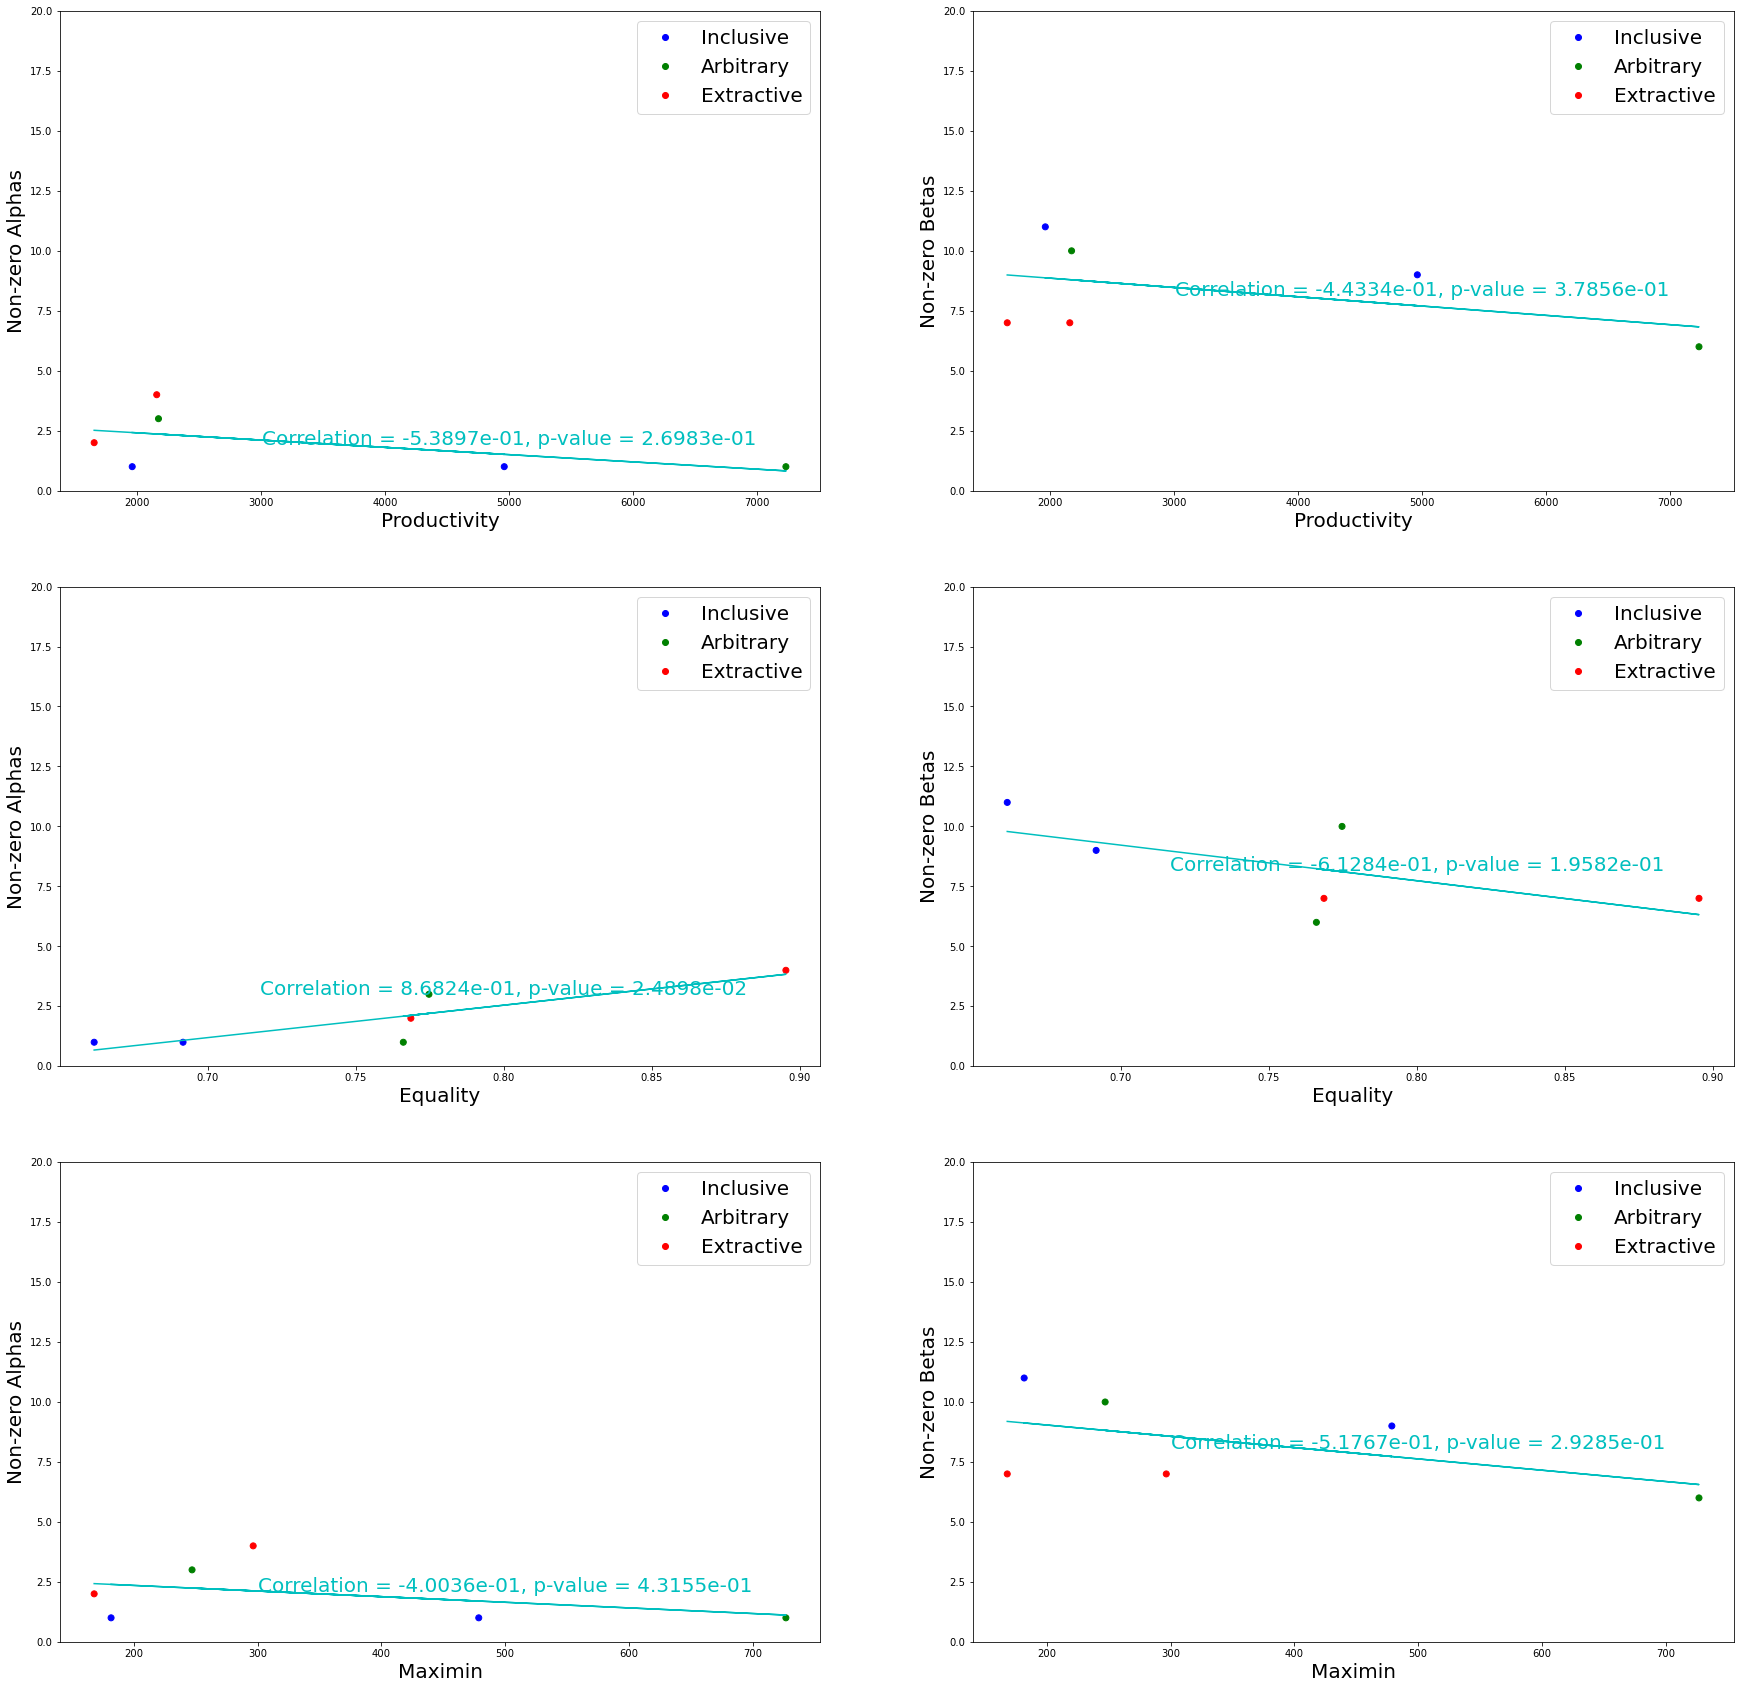

In [12]:
fig, axs = plt.subplots(3, 2, figsize = (10 * 3, 15 * 2))
#fig.suptitle('Productivity, Equality, and Maximin vs Inequity Aversion Coefficients across Three Governing Institutions', fontsize=30)

ax = axs[0, 0]

ax.set_xlabel('Productivity', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [productivity_inclusive[0].mean(),
     productivity_inclusive[1].mean(),
     productivity_arbitrary[0].mean(),
     productivity_arbitrary[1].mean(),
     productivity_extractive[0].mean(),
     productivity_extractive[1].mean()]

y = [alpha_inclusive_nonzero[0],
     alpha_inclusive_nonzero[1],
     alpha_arbitrary_nonzero[0],
     alpha_arbitrary_nonzero[1],
     alpha_extractive_nonzero[0],
     alpha_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (5000, intercept + slope * 5000),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[0, 1]

ax.set_xlabel('Productivity', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [productivity_inclusive[0].mean(),
     productivity_inclusive[1].mean(),
     productivity_arbitrary[0].mean(),
     productivity_arbitrary[1].mean(),
     productivity_extractive[0].mean(),
     productivity_extractive[1].mean()]

y = [beta_inclusive_nonzero[0],
     beta_inclusive_nonzero[1],
     beta_arbitrary_nonzero[0],
     beta_arbitrary_nonzero[1],
     beta_extractive_nonzero[0],
     beta_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (5000, intercept + slope * 5000),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))

ax = axs[1, 0]

ax.set_xlabel('Equality', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [equality_inclusive[0].mean(),
     equality_inclusive[1].mean(),
     equality_arbitrary[0].mean(),
     equality_arbitrary[1].mean(),
     equality_extractive[0].mean(),
     equality_extractive[1].mean()]

y = [alpha_inclusive_nonzero[0],
     alpha_inclusive_nonzero[1],
     alpha_arbitrary_nonzero[0],
     alpha_arbitrary_nonzero[1],
     alpha_extractive_nonzero[0],
     alpha_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (0.8, intercept + slope * 0.8),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[1, 1]

ax.set_xlabel('Equality', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [equality_inclusive[0].mean(),
     equality_inclusive[1].mean(),
     equality_arbitrary[0].mean(),
     equality_arbitrary[1].mean(),
     equality_extractive[0].mean(),
     equality_extractive[1].mean()]

y = [beta_inclusive_nonzero[0],
     beta_inclusive_nonzero[1],
     beta_arbitrary_nonzero[0],
     beta_arbitrary_nonzero[1],
     beta_extractive_nonzero[0],
     beta_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (0.8, intercept + slope * 0.8),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))

ax = axs[2, 0]

ax.set_xlabel('Maximin', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [maximin_inclusive[0].mean(),
     maximin_inclusive[1].mean(),
     maximin_arbitrary[0].mean(),
     maximin_arbitrary[1].mean(),
     maximin_extractive[0].mean(),
     maximin_extractive[1].mean()]

y = [alpha_inclusive_nonzero[0],
     alpha_inclusive_nonzero[1],
     alpha_arbitrary_nonzero[0],
     alpha_arbitrary_nonzero[1],
     alpha_extractive_nonzero[0],
     alpha_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (500, intercept + slope * 500),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[2, 1]

ax.set_xlabel('Maximin', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [maximin_inclusive[0].mean(),
     maximin_inclusive[1].mean(),
     maximin_arbitrary[0].mean(),
     maximin_arbitrary[1].mean(),
     maximin_extractive[0].mean(),
     maximin_extractive[1].mean()]

y = [beta_inclusive_nonzero[0],
     beta_inclusive_nonzero[1],
     beta_arbitrary_nonzero[0],
     beta_arbitrary_nonzero[1],
     beta_extractive_nonzero[0],
     beta_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (500, intercept + slope * 500),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=20)
           
#ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
fig.savefig('Productivity, Equality, and Maximin vs Inequity Aversion Coefficients across Three Governing Institutions.png')

## Communication alignment across three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

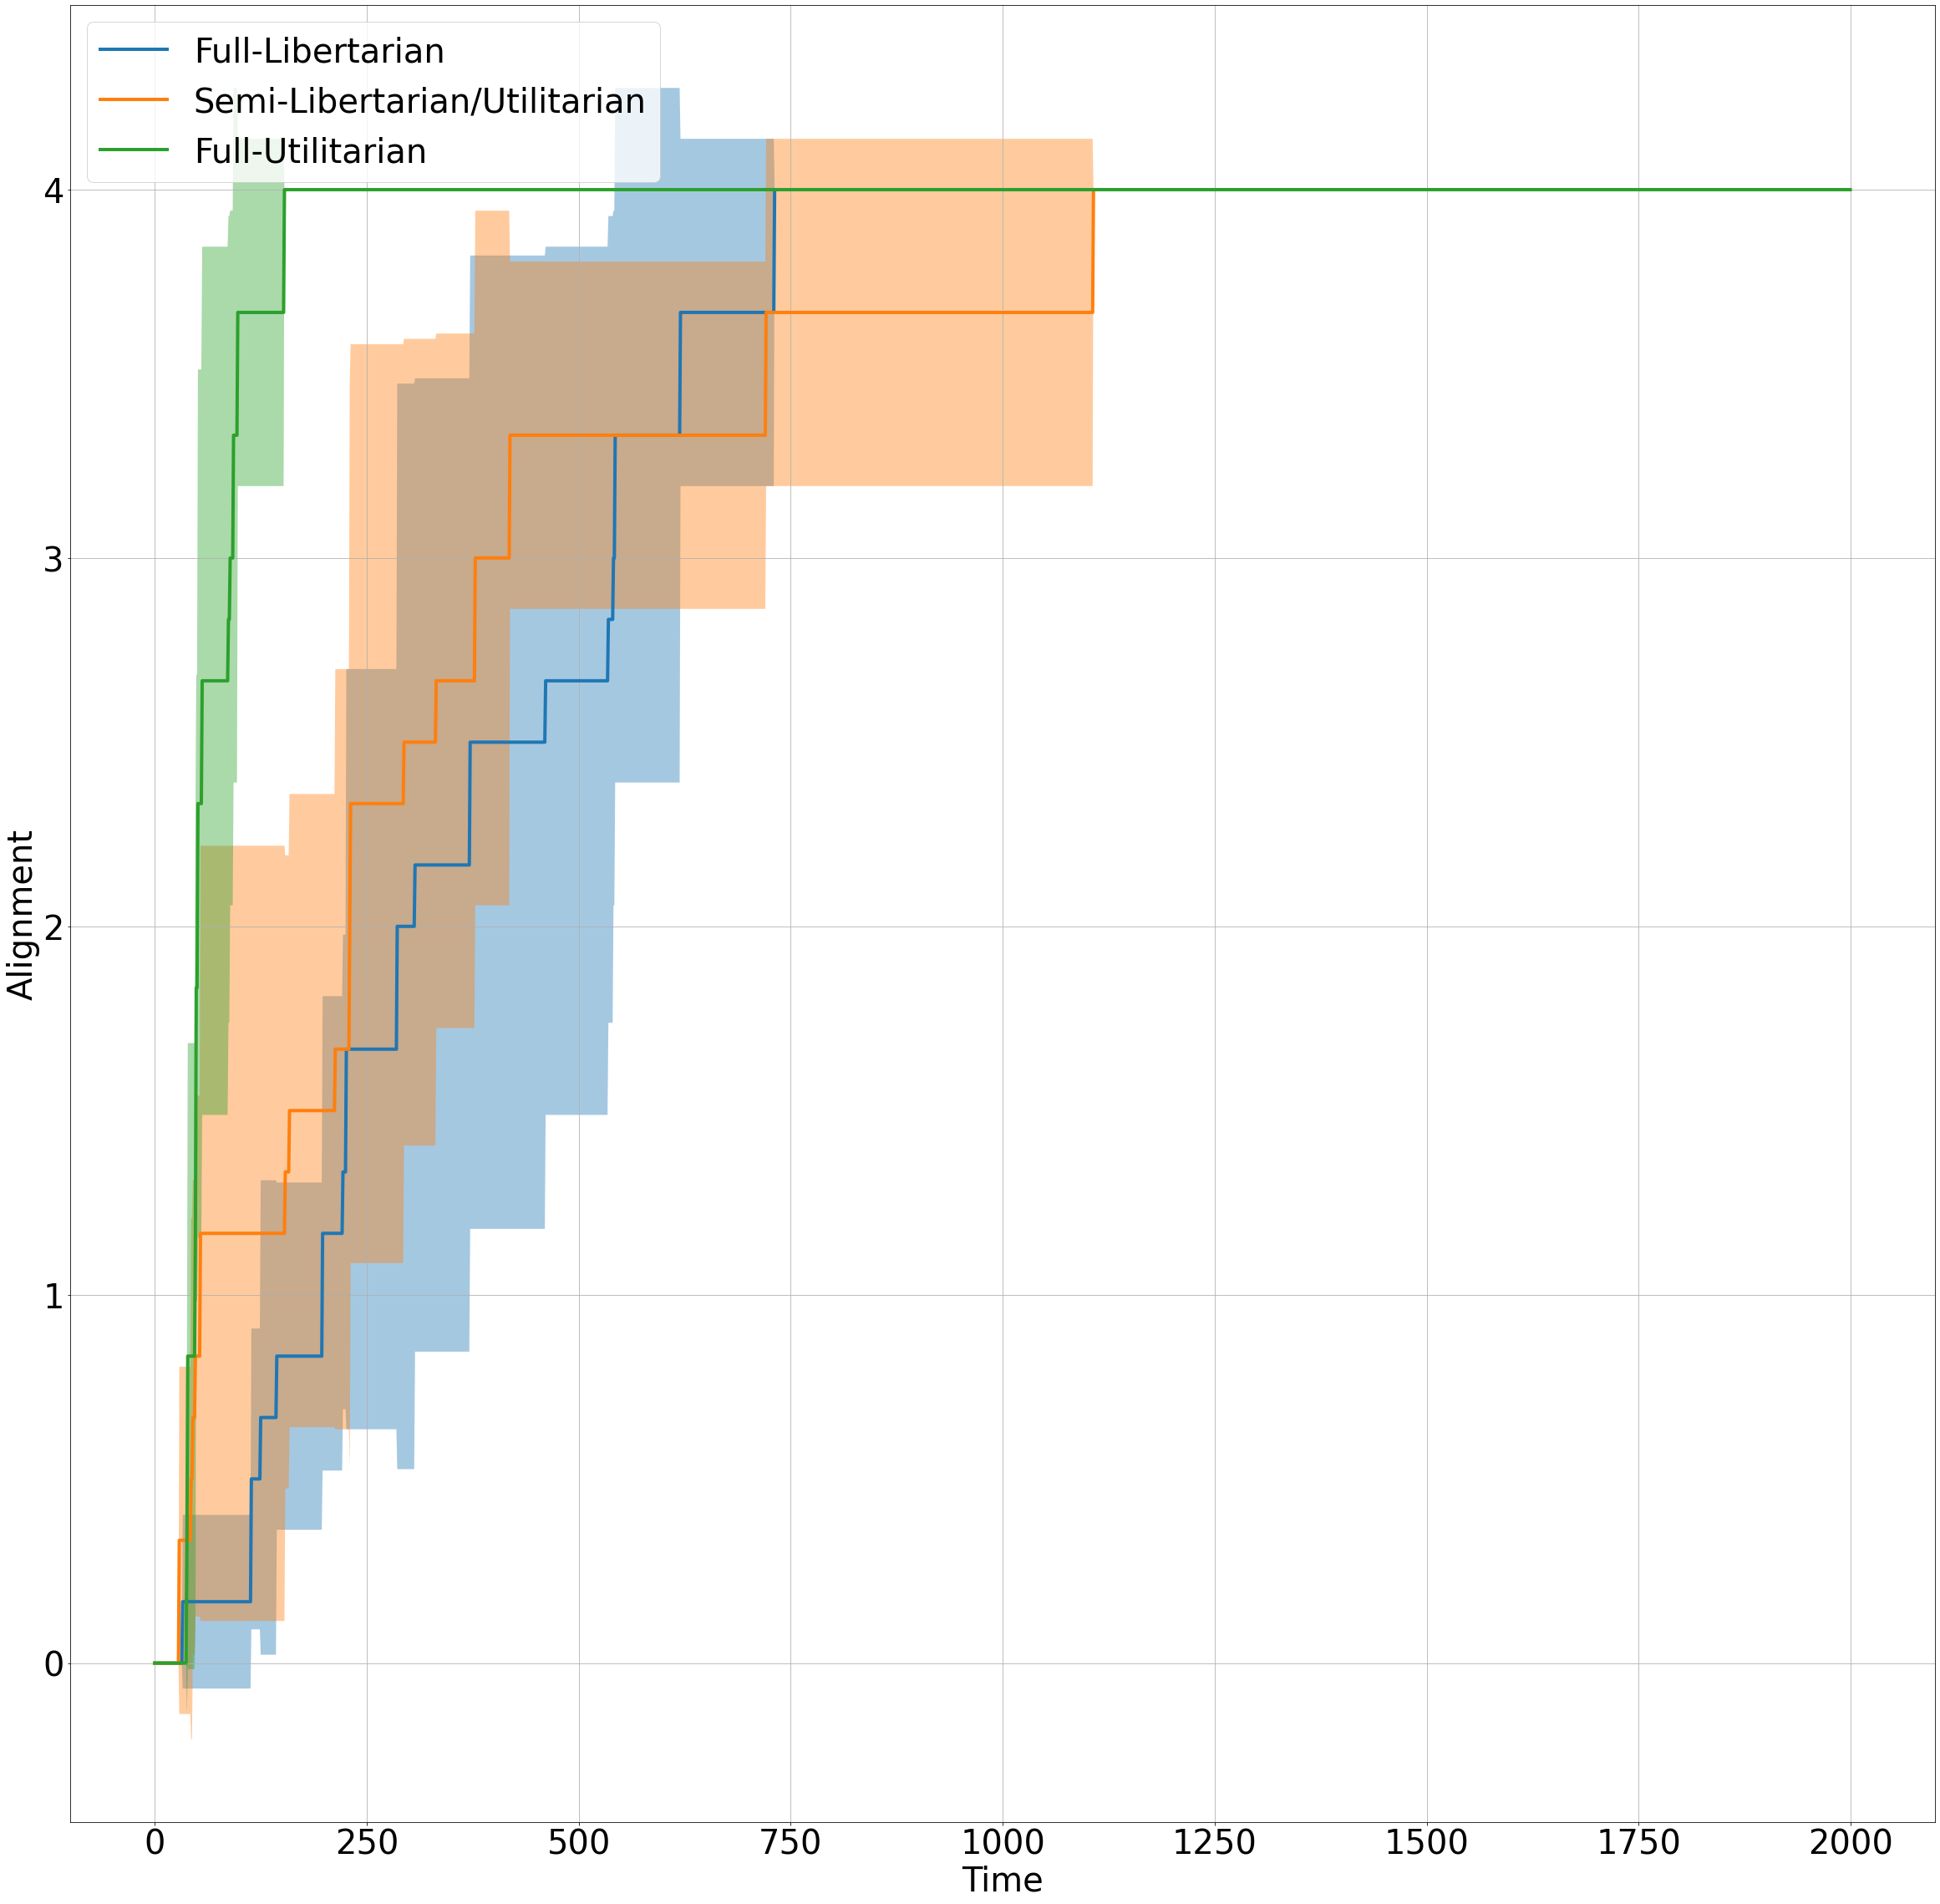

In [13]:
similarity_full_libertarian = []
similarity_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[0] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_full_libertarian.append(scipy.io.loadmat(parent_folder + results_subfolders[1] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_full_libertarian = np.array(similarity_full_libertarian)

similarity_semi_libertarian_utilitarian = []
similarity_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_semi_libertarian_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_semi_libertarian_utilitarian = np.array(similarity_semi_libertarian_utilitarian)

similarity_full_utilitarian = []
similarity_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[8] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_full_utilitarian.append(scipy.io.loadmat(parent_folder + results_subfolders[9] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_full_utilitarian = np.array(similarity_full_utilitarian)

fig, axes = plt.subplots(1, 1, figsize = (40 * 1, 40 * 1), sharex = 'row', sharey = 'col')
#fig.suptitle('Degree of Language Alignment among Agents across an Episode', fontsize=50)

ax = axes
ax.plot(np.arange(2000), (similarity_full_libertarian[0, :, 0] + similarity_full_libertarian[1, :, 0]) / 2, lw = 4, label = 'Full-Libertarian')
ax.plot(np.arange(2000), (similarity_semi_libertarian_utilitarian[0, :, 0] + similarity_semi_libertarian_utilitarian[1, :, 0]) / 2, lw = 4, label = 'Semi-Libertarian/Utilitarian')
ax.plot(np.arange(2000), (similarity_full_utilitarian[0, :, 0] + similarity_full_utilitarian[1, :, 0]) / 2, lw = 4, label = 'Full-Utilitarian')
ax.fill_between(np.arange(2000), (similarity_full_libertarian[0, :, 0] + similarity_full_libertarian[1, :, 0]) / 2 + (similarity_full_libertarian[0, :, 1] + similarity_full_libertarian[1, :, 1]) / 2, (similarity_full_libertarian[0, :, 0] + similarity_full_libertarian[1, :, 0]) / 2 - (similarity_full_libertarian[0, :, 1] + similarity_full_libertarian[1, :, 1]) / 2, facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), (similarity_semi_libertarian_utilitarian[0, :, 0] + similarity_semi_libertarian_utilitarian[1, :, 0]) / 2 + (similarity_semi_libertarian_utilitarian[0, :, 1] + similarity_semi_libertarian_utilitarian[1, :, 1]) / 2, (similarity_semi_libertarian_utilitarian[0, :, 0] + similarity_semi_libertarian_utilitarian[1, :, 0]) / 2 - (similarity_semi_libertarian_utilitarian[0, :, 1] + similarity_semi_libertarian_utilitarian[1, :, 1]) / 2, facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), (similarity_full_utilitarian[0, :, 0] + similarity_full_utilitarian[1, :, 0]) / 2 + (similarity_full_utilitarian[0, :, 1] + similarity_full_utilitarian[1, :, 1]) / 2, (similarity_full_utilitarian[0, :, 0] + similarity_full_utilitarian[1, :, 0]) / 2 - (similarity_full_utilitarian[0, :, 1] + similarity_full_utilitarian[1, :, 1]) / 2, facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_xticks(ticks = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])
ax.set_xticklabels(labels = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], fontsize=40)
ax.set_xlabel('Time', fontsize = 40)
ax.set_yticks(ticks = [0, 1, 2, 3, 4])
ax.set_yticklabels(labels = [0, 1, 2, 3, 4], fontsize=40)
ax.set_ylabel('Alignment', fontsize=40)
ax.grid()

fig.savefig('Degree of Language Alignment among Agents across an Episode for Three Governing Systems.png')

## Communication alignment in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

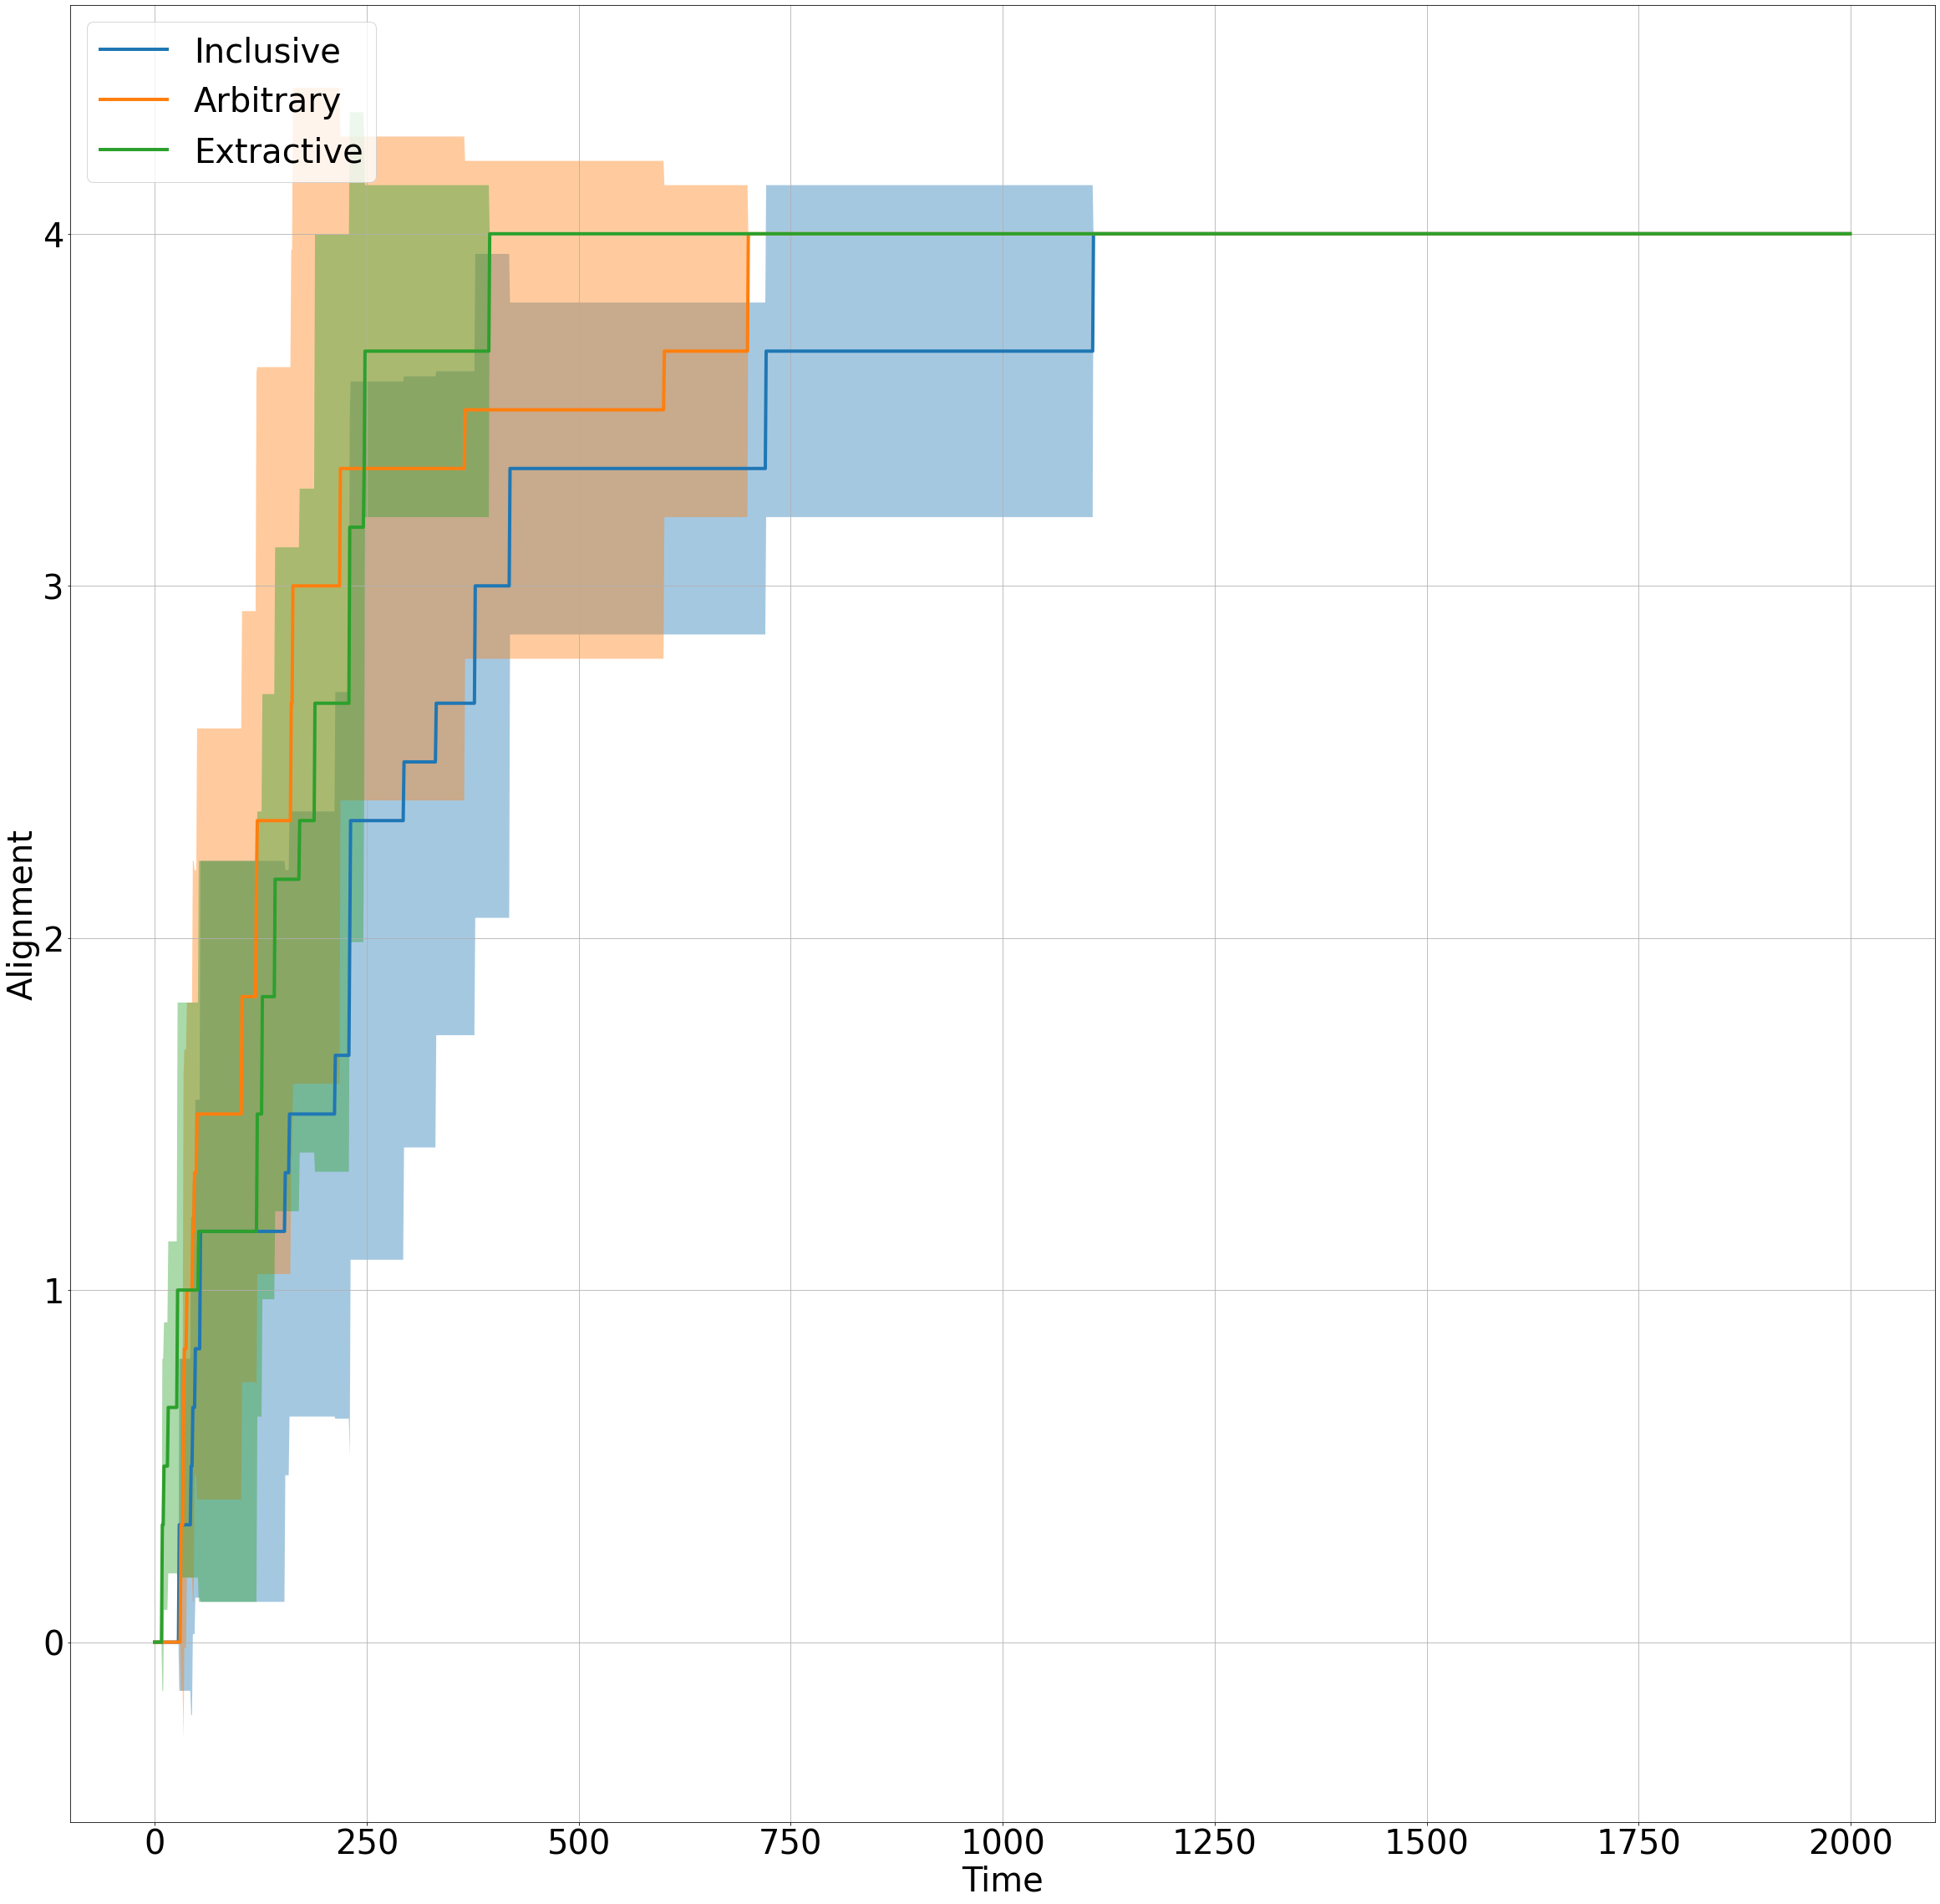

In [14]:
similarity_inclusive = []
similarity_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[6] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_inclusive.append(scipy.io.loadmat(parent_folder + results_subfolders[7] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_inclusive = np.array(similarity_inclusive)

similarity_arbitrary = []
similarity_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[2] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_arbitrary.append(scipy.io.loadmat(parent_folder + results_subfolders[3] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_arbitrary = np.array(similarity_arbitrary)

similarity_extractive = []
similarity_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[4] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_extractive.append(scipy.io.loadmat(parent_folder + results_subfolders[5] + '/words_similarity_all.mat')['words_similarity_all'])
similarity_extractive = np.array(similarity_extractive)

fig, axes = plt.subplots(1, 1, figsize = (40 * 1, 40 * 1), sharex = 'row', sharey = 'col')
#fig.suptitle('Degree of Language Alignment among Agents across an Episode', fontsize=50)

ax = axes
ax.plot(np.arange(2000), (similarity_inclusive[0, :, 0] + similarity_inclusive[1, :, 0]) / 2, lw = 4, label = 'Inclusive')
ax.plot(np.arange(2000), (similarity_arbitrary[0, :, 0] + similarity_arbitrary[1, :, 0]) / 2, lw = 4, label = 'Arbitrary')
ax.plot(np.arange(2000), (similarity_extractive[0, :, 0] + similarity_extractive[1, :, 0]) / 2, lw = 4, label = 'Extractive')
ax.fill_between(np.arange(2000), (similarity_inclusive[0, :, 0] + similarity_inclusive[1, :, 0]) / 2 + (similarity_inclusive[0, :, 1] + similarity_inclusive[1, :, 1]) / 2, (similarity_inclusive[0, :, 0] + similarity_inclusive[1, :, 0]) / 2 - (similarity_inclusive[0, :, 1] + similarity_inclusive[1, :, 1]) / 2, facecolor = 'C0', alpha = 0.4)
ax.fill_between(np.arange(2000), (similarity_arbitrary[0, :, 0] + similarity_arbitrary[1, :, 0]) / 2 + (similarity_arbitrary[0, :, 1] + similarity_arbitrary[1, :, 1]) / 2, (similarity_arbitrary[0, :, 0] + similarity_arbitrary[1, :, 0]) / 2 - (similarity_arbitrary[0, :, 1] + similarity_arbitrary[1, :, 1]) / 2, facecolor = 'C1', alpha = 0.4)
ax.fill_between(np.arange(2000), (similarity_extractive[0, :, 0] + similarity_extractive[1, :, 0]) / 2 + (similarity_extractive[0, :, 1] + similarity_extractive[1, :, 1]) / 2, (similarity_extractive[0, :, 0] + similarity_extractive[1, :, 0]) / 2 - (similarity_extractive[0, :, 1] + similarity_extractive[1, :, 1]) / 2, facecolor = 'C2', alpha = 0.4)
ax.legend(loc = 'upper left', fontsize = 40)
ax.set_xticks(ticks = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])
ax.set_xticklabels(labels = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], fontsize=40)
ax.set_xlabel('Time', fontsize = 40)
ax.set_yticks(ticks = [0, 1, 2, 3, 4])
ax.set_yticklabels(labels = [0, 1, 2, 3, 4], fontsize=40)
ax.set_ylabel('Alignment', fontsize=40)
ax.grid()

fig.savefig('Degree of Language Alignment among Agents across an Episode for Three Governing Institutions.png')

## Degree of language alignment vs Inequity Aversion Coefficients across three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

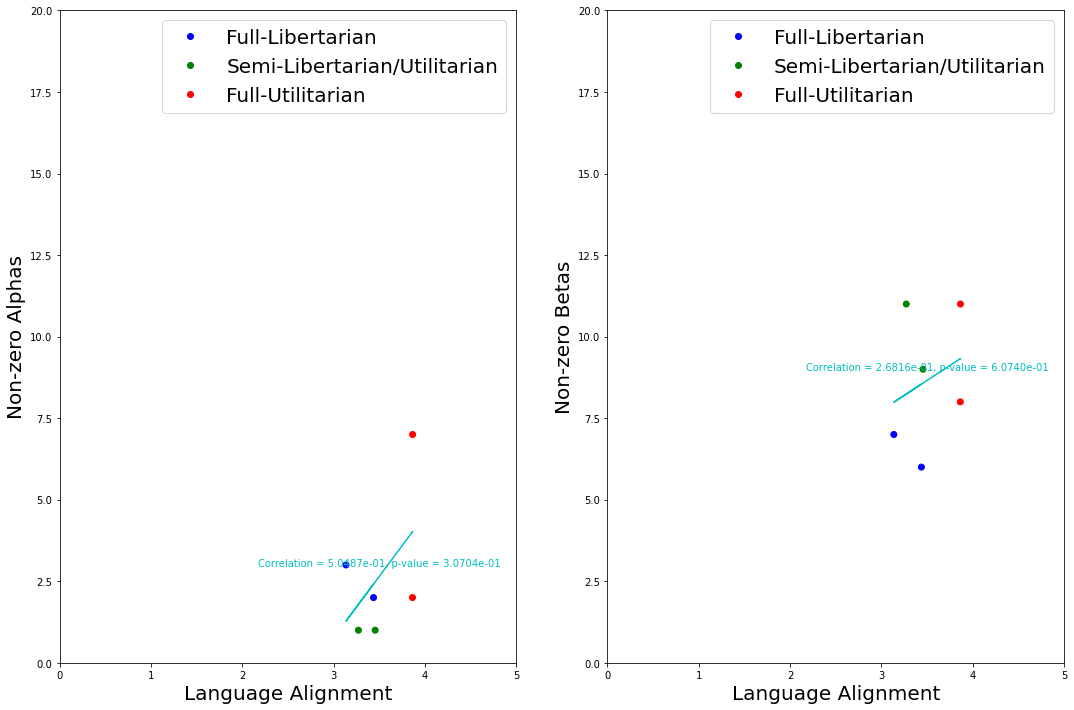

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (18 * 1, 6 * 2))
#fig.suptitle('Degree of Language Alignment vs Inequity Aversion Coefficients across Three Governing Systems', fontsize=20)

ax = axs[0]

ax.set_xlabel('Language Alignment', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [similarity_full_libertarian[0, :, 0].mean(),
     similarity_full_libertarian[1, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[0, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[1, :, 0].mean(),
     similarity_full_utilitarian[0, :, 0].mean(),
     similarity_full_utilitarian[1, :, 0].mean()]

y = [alpha_full_libertarian_nonzero[0],
     alpha_full_libertarian_nonzero[1],
     alpha_semi_libertarian_utilitarian_nonzero[0],
     alpha_semi_libertarian_utilitarian_nonzero[1],
     alpha_full_utilitarian_nonzero[0],
     alpha_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[1]

ax.set_xlabel('Language Alignment', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [similarity_full_libertarian[0, :, 0].mean(),
     similarity_full_libertarian[1, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[0, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[1, :, 0].mean(),
     similarity_full_utilitarian[0, :, 0].mean(),
     similarity_full_utilitarian[1, :, 0].mean()]

y = [beta_full_libertarian_nonzero[0],
     beta_full_libertarian_nonzero[1],
     beta_semi_libertarian_utilitarian_nonzero[0],
     beta_semi_libertarian_utilitarian_nonzero[1],
     beta_full_utilitarian_nonzero[0],
     beta_full_utilitarian_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
fig.savefig('Degree of Language Alignment vs Inequity Aversion Coefficients across Three Governing Systems.png')

## Degree of language alignment vs Inequity Aversion Coefficients in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

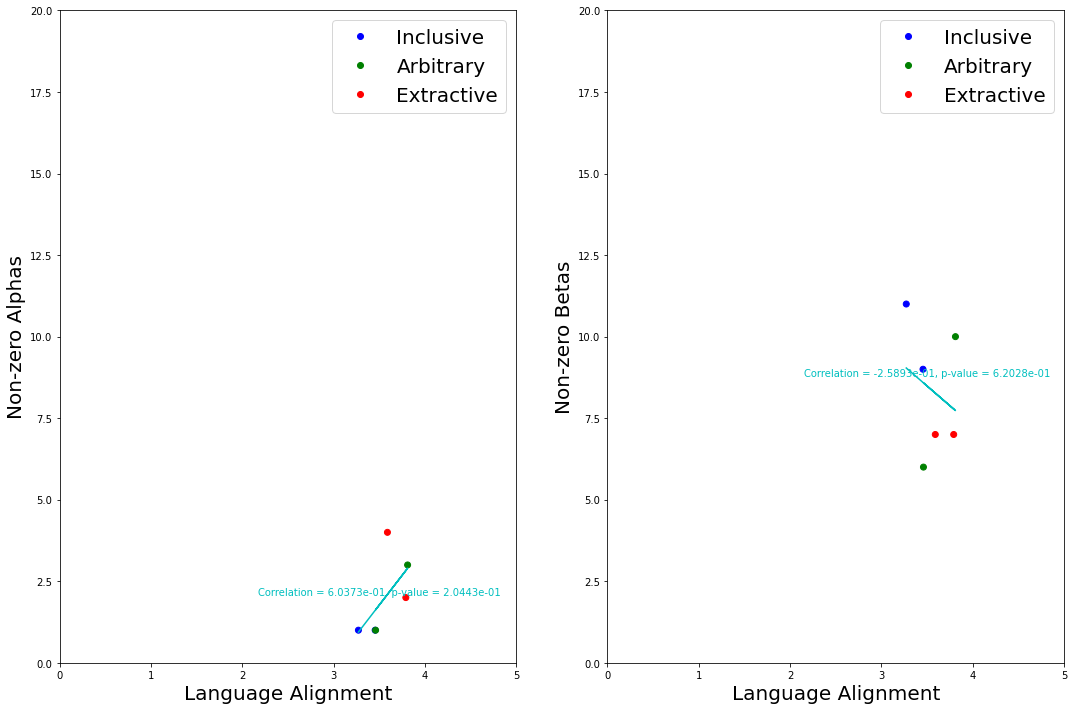

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (18 * 1, 6 * 2))
#fig.suptitle('Degree of Language Alignment vs Inequity Aversion Coefficients across Three Governing Institutions', fontsize=20)

ax = axs[0]

ax.set_xlabel('Language Alignment', fontsize=20)
ax.set_ylabel('Non-zero Alphas', fontsize=20)
    
x = [similarity_inclusive[0, :, 0].mean(),
     similarity_inclusive[1, :, 0].mean(),
     similarity_arbitrary[0, :, 0].mean(),
     similarity_arbitrary[1, :, 0].mean(),
     similarity_extractive[0, :, 0].mean(),
     similarity_extractive[1, :, 0].mean()]

y = [alpha_inclusive_nonzero[0],
     alpha_inclusive_nonzero[1],
     alpha_arbitrary_nonzero[0],
     alpha_arbitrary_nonzero[1],
     alpha_extractive_nonzero[0],
     alpha_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
ax = axs[1]

ax.set_xlabel('Language Alignment', fontsize=20)
ax.set_ylabel('Non-zero Betas', fontsize=20)
    
x = [similarity_inclusive[0, :, 0].mean(),
     similarity_inclusive[1, :, 0].mean(),
     similarity_arbitrary[0, :, 0].mean(),
     similarity_arbitrary[1, :, 0].mean(),
     similarity_extractive[0, :, 0].mean(),
     similarity_extractive[1, :, 0].mean()]

y = [beta_inclusive_nonzero[0],
     beta_inclusive_nonzero[1],
     beta_arbitrary_nonzero[0],
     beta_arbitrary_nonzero[1],
     beta_extractive_nonzero[0],
     beta_extractive_nonzero[1]]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=20)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
ax.set_ylim((0, 20))
    
fig.savefig('Degree of Language Alignment vs Inequity Aversion Coefficients across Three Governing Institutions.png')

## Degree of language alignment vs Productivity, Equality, and Maximin across three governing systems: Full-Libertarain, Semi-Libertarian/Utilitarian, Full-Utilitarian

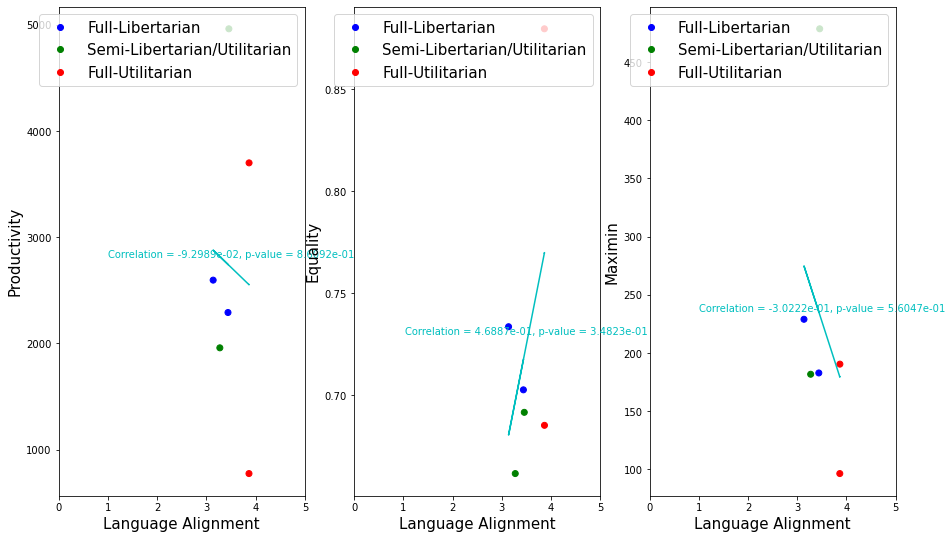

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (15 * 1, 3 * 3))
#fig.suptitle('Degree of Language Alignment vs Productivity, Equality, and Maximin across Three Governing Systems', fontsize=20)

ax = axs[0]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Productivity', fontsize=15)
    
x = [similarity_full_libertarian[0, :, 0].mean(),
     similarity_full_libertarian[1, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[0, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[1, :, 0].mean(),
     similarity_full_utilitarian[0, :, 0].mean(),
     similarity_full_utilitarian[1, :, 0].mean()]

y = [productivity_full_libertarian[0].mean(),
     productivity_full_libertarian[1].mean(),
     productivity_semi_libertarian_utilitarian[0].mean(),
     productivity_semi_libertarian_utilitarian[1].mean(),
     productivity_full_utilitarian[0].mean(),
     productivity_full_utilitarian[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))
    
ax = axs[1]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Equality', fontsize=15)
    
x = [similarity_full_libertarian[0, :, 0].mean(),
     similarity_full_libertarian[1, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[0, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[1, :, 0].mean(),
     similarity_full_utilitarian[0, :, 0].mean(),
     similarity_full_utilitarian[1, :, 0].mean()]

y = [equality_full_libertarian[0].mean(),
     equality_full_libertarian[1].mean(),
     equality_semi_libertarian_utilitarian[0].mean(),
     equality_semi_libertarian_utilitarian[1].mean(),
     equality_full_utilitarian[0].mean(),
     equality_full_utilitarian[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))

ax = axs[2]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Maximin', fontsize=15)
    
x = [similarity_full_libertarian[0, :, 0].mean(),
     similarity_full_libertarian[1, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[0, :, 0].mean(),
     similarity_semi_libertarian_utilitarian[1, :, 0].mean(),
     similarity_full_utilitarian[0, :, 0].mean(),
     similarity_full_utilitarian[1, :, 0].mean()]

y = [maximin_full_libertarian[0].mean(),
     maximin_full_libertarian[1].mean(),
     maximin_semi_libertarian_utilitarian[0].mean(),
     maximin_semi_libertarian_utilitarian[1].mean(),
     maximin_full_utilitarian[0].mean(),
     maximin_full_utilitarian[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Full-Libertarian', 'Semi-Libertarian/Utilitarian', 'Full-Utilitarian']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))
    
fig.savefig('Degree of Language Alignment vs Productivity, Equality, and Maximin across Three Governing Systems.png')

## Degree of language alignment vs Productivity, Equality, and Maximin in the Semi-Libertarian/Utilitarian governing system across three governing institutions: Inclusive, Arbitrary, Extractive

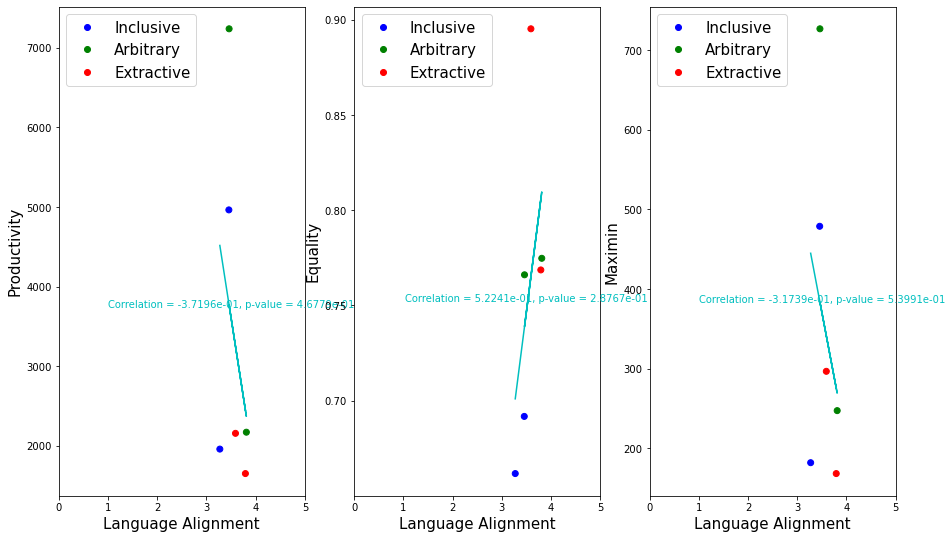

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (15 * 1, 3 * 3))
#fig.suptitle('Degree of Language Alignment vs Productivity, Equality, and Maximin across Three Governing Institutions', fontsize=20)

ax = axs[0]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Productivity', fontsize=15)
    
x = [similarity_inclusive[0, :, 0].mean(),
     similarity_inclusive[1, :, 0].mean(),
     similarity_arbitrary[0, :, 0].mean(),
     similarity_arbitrary[1, :, 0].mean(),
     similarity_extractive[0, :, 0].mean(),
     similarity_extractive[1, :, 0].mean()]

y = [productivity_inclusive[0].mean(),
     productivity_inclusive[1].mean(),
     productivity_arbitrary[0].mean(),
     productivity_arbitrary[1].mean(),
     productivity_extractive[0].mean(),
     productivity_extractive[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))
    
ax = axs[1]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Equality', fontsize=15)
    
x = [similarity_inclusive[0, :, 0].mean(),
     similarity_inclusive[1, :, 0].mean(),
     similarity_arbitrary[0, :, 0].mean(),
     similarity_arbitrary[1, :, 0].mean(),
     similarity_extractive[0, :, 0].mean(),
     similarity_extractive[1, :, 0].mean()]

y = [equality_inclusive[0].mean(),
     equality_inclusive[1].mean(),
     equality_arbitrary[0].mean(),
     equality_arbitrary[1].mean(),
     equality_extractive[0].mean(),
     equality_extractive[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))

ax = axs[2]

ax.set_xlabel('Language Alignment', fontsize=15)
ax.set_ylabel('Maximin', fontsize=15)
    
x = [similarity_inclusive[0, :, 0].mean(),
     similarity_inclusive[1, :, 0].mean(),
     similarity_arbitrary[0, :, 0].mean(),
     similarity_arbitrary[1, :, 0].mean(),
     similarity_extractive[0, :, 0].mean(),
     similarity_extractive[1, :, 0].mean()]

y = [maximin_inclusive[0].mean(),
     maximin_inclusive[1].mean(),
     maximin_arbitrary[0].mean(),
     maximin_arbitrary[1].mean(),
     maximin_extractive[0].mean(),
     maximin_extractive[1].mean()]
    
point_label = [1, 1, 2, 2, 3, 3]
    
colours = ListedColormap(['b', 'g', 'r'])
scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
classes = ['Inclusive', 'Arbitrary', 'Extractive']
ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes, fontsize=15)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax.plot(np.array(x), intercept + slope * np.array(x), color = 'c')
    
ax.annotate('Correlation = {:.4e}'.format(r_value) + ', p-value = {:.4e}'.format(p_value),
            (3.5, intercept + slope * 3.5),
            textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c', fontsize=10)
           
ax.set_xlim((0, 5))
#ax.set_ylim((0, 20))
    
fig.savefig('Degree of Language Alignment vs Productivity, Equality, and Maximin across Three Governing Institutions.png')